<a href="https://colab.research.google.com/github/ParkJongHyeok99/Data_Analysis_Airbnb/blob/main/Data_Analysis_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google colab 연동 및 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

source_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/detailed_listings.csv')

source_data.shape

delete_columns_data = source_data.drop(labels=['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
                                               'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
                                               'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                                               'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                                               'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
                                               'has_availability', 'availability_30', 'availability_60', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
                                               'last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                                               'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], axis = 1)       #사용하지 않는 열 제거

delete_columns_data.shape

(38792, 25)

In [ ]:
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,9630344,NaN,NaN,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,364,5,4.8,4.6,5.0,5.0,5.0,4.8,5.0,f
1,3533741,NaN,NaN,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,9731039,NaN,NaN,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [ ]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            25618 non-null  object 
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      21892 non-null  float64
 11  beds                          38129 non-null  float64
 12  amenities                     38792 non-null  object 
 13  p

In [ ]:
#ID 변수인 id값의 중복 여부 체크
n = len(pd.unique(delete_columns_data['id']))
print(n)

38792


In [ ]:
#구간 변수 : host_response_rate, latitude , longitude , accommodates, bedrooms, beds, availability_90, availability_365, number_of_reviews, amenities
#구간 변수 : review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value (17개)

#host_response_rate을 numeric으로 변환
delete_columns_data['host_response_rate'] = delete_columns_data['host_response_rate'].str.replace('%', '').astype(float)


#amenities변수를 개수로 변환
delete_columns_data['amenities'] = delete_columns_data['amenities'].apply(lambda x: x.count(','))
delete_columns_data['amenities'].astype(int)
delete_columns_data['amenities'] = delete_columns_data['amenities'] + 1

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            25618 non-null  float64
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      21892 non-null  float64
 11  beds                          38129 non-null  float64
 12  amenities                     38792 non-null  int64  
 13  p

In [ ]:
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,9630344,NaN,NaN,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,364,5,4.8,4.6,5.0,5.0,5.0,4.8,5.0,f
1,3533741,NaN,NaN,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,9731039,NaN,NaN,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [ ]:
#구간 변수 결측값 평균으로 대체
#host_response_rate
mean_host_response_rate = delete_columns_data['host_response_rate'].mean()
delete_columns_data['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

#bedrooms
mean_bedrooms = delete_columns_data['bedrooms'].mean()
delete_columns_data['bedrooms'].fillna(mean_bedrooms, inplace=True)

#beds
mean_beds = delete_columns_data['beds'].mean()
delete_columns_data['beds'].fillna(mean_beds, inplace=True)

#beds
mean_beds = delete_columns_data['beds'].mean()
delete_columns_data['beds'].fillna(mean_beds, inplace=True)

#review_scores_rating
mean_review_scores_rating = delete_columns_data['review_scores_rating'].mean()
delete_columns_data['review_scores_rating'].fillna(mean_review_scores_rating, inplace=True)

#review_scores_accuracy
mean_review_scores_accuracy = delete_columns_data['review_scores_accuracy'].mean()
delete_columns_data['review_scores_accuracy'].fillna(mean_review_scores_accuracy, inplace=True)

#review_scores_cleanliness
mean_review_scores_cleanliness = delete_columns_data['review_scores_cleanliness'].mean()
delete_columns_data['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)

#review_scores_checkin
mean_review_scores_checkin = delete_columns_data['review_scores_checkin'].mean()
delete_columns_data['review_scores_checkin'].fillna(mean_review_scores_checkin, inplace=True)

#review_scores_communication
mean_review_scores_communication = delete_columns_data['review_scores_communication'].mean()
delete_columns_data['review_scores_communication'].fillna(mean_review_scores_communication, inplace=True)

#review_scores_location
mean_review_scores_location = delete_columns_data['review_scores_location'].mean()
delete_columns_data['review_scores_location'].fillna(mean_review_scores_location, inplace=True)

#review_scores_value
mean_review_scores_value = delete_columns_data['review_scores_value'].mean()
delete_columns_data['review_scores_value'].fillna(mean_review_scores_value, inplace=True)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            38792 non-null  float64
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38792 non-null  float64
 11  beds                          38792 non-null  float64
 12  amenities                     38792 non-null  int64  
 13  p

In [ ]:
#범주형 변수 : host_response_time, host_is_superhost, neighbourhood_group_cleansed, room_type, bathrooms_text, instant_bookable, price_B (7개)

#host_is_superhost
delete_columns_data['host_is_superhost'].fillna('f', inplace=True)

#bathrooms_text
delete_columns_data = delete_columns_data.dropna(subset=['bathrooms_text'])

#host_response_time
delete_columns_data['host_response_time'].fillna('a few days or more', inplace=True)

<ipython-input-212-45c77b50c0b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delete_columns_data['host_response_time'].fillna('a few days or more', inplace=True)


In [ ]:
unique_values = delete_columns_data['bathrooms_text'].unique()
print(unique_values)

['1 shared bath' '1 bath' '1 private bath' '2 baths' '2.5 baths'
 '1.5 baths' '4 shared baths' '2 shared baths' '1.5 shared baths'
 'Shared half-bath' 'Half-bath' '3 baths' '3.5 baths' '3 shared baths'
 '4.5 baths' '4 baths' '0 shared baths' '0 baths' '6.5 baths'
 '2.5 shared baths' '5 baths' '6 baths' '7 baths' '15.5 baths'
 'Private half-bath' '5.5 shared baths' '8 baths' '6 shared baths'
 '5.5 baths' '4.5 shared baths' '8.5 baths' '3.5 shared baths']


In [ ]:
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('1 private bath', '1 bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Shared half-bath', '0.5 shared bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Half-bath', '0.5 bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Private half-bath', '0.5 bath')

In [ ]:
unique_values = delete_columns_data['bathrooms_text'].unique()
print(unique_values)

['1 shared bath' '1 bath' '2 baths' '2.5 baths' '1.5 baths'
 '4 shared baths' '2 shared baths' '1.5 shared baths' '0.5 shared bath'
 '0.5 bath' '3 baths' '3.5 baths' '3 shared baths' '4.5 baths' '4 baths'
 '0 shared baths' '0 baths' '6.5 baths' '2.5 shared baths' '5 baths'
 '6 baths' '7 baths' '15.5 baths' '5.5 shared baths' '8 baths'
 '6 shared baths' '5.5 baths' '4.5 shared baths' '8.5 baths'
 '3.5 shared baths']


In [ ]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

타겟 변수 설정

In [ ]:
#price 변수 object에서 float로 변환
delete_columns_data['price'] = delete_columns_data['price'].str.replace('[\$,]', '', regex=True).astype(float)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

In [ ]:
# 타겟 변수 값이 중위수 이상이면 1, 아니면 0
# 이진값 타겟 변수 price_B
c1 = delete_columns_data['price'] >= delete_columns_data['price'].median()
c0 = delete_columns_data['price'] < delete_columns_data['price'].median()

delete_columns_data.loc[c1, "price_B"] = 1
delete_columns_data.loc[c0, "price_B"] = 0
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_B
0,9630344,a few days or more,92.557264,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,5,4.800000,4.600000,5.000000,5.000000,5.000000,4.80000,5.000000,f,0.0
1,3533741,a few days or more,92.557264,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,4.625896,4.740582,4.622926,4.811373,4.805698,4.72422,4.621431,f,0.0
2,9731039,a few days or more,92.557264,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,4.625896,4.740582,4.622926,4.811373,4.805698,4.72422,4.621431,f,0.0


In [ ]:
delete_columns_data['price_B'] = delete_columns_data['price_B'].astype('object')
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

이상값 제거(구간 변수)

<Axes: xlabel='review_scores_value'>

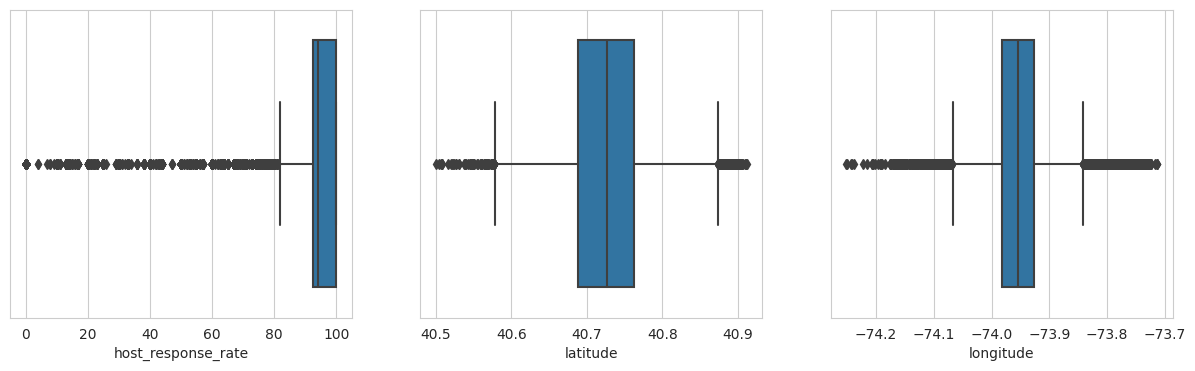

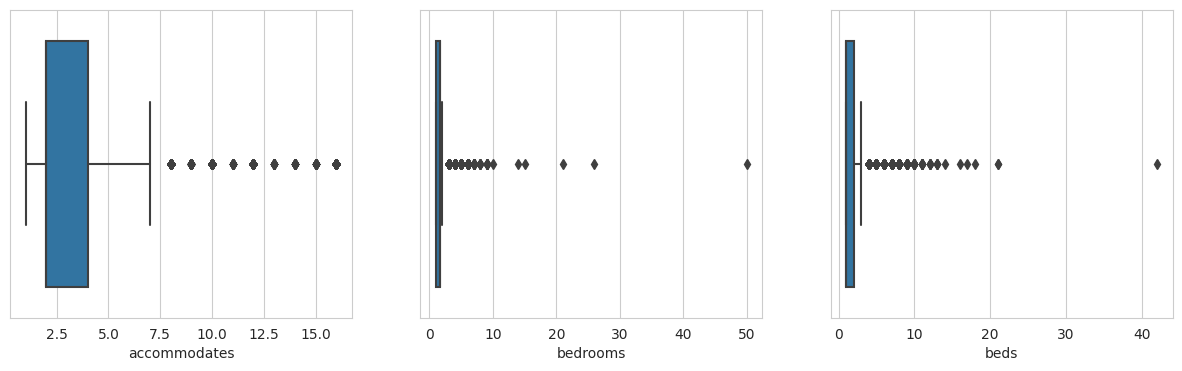

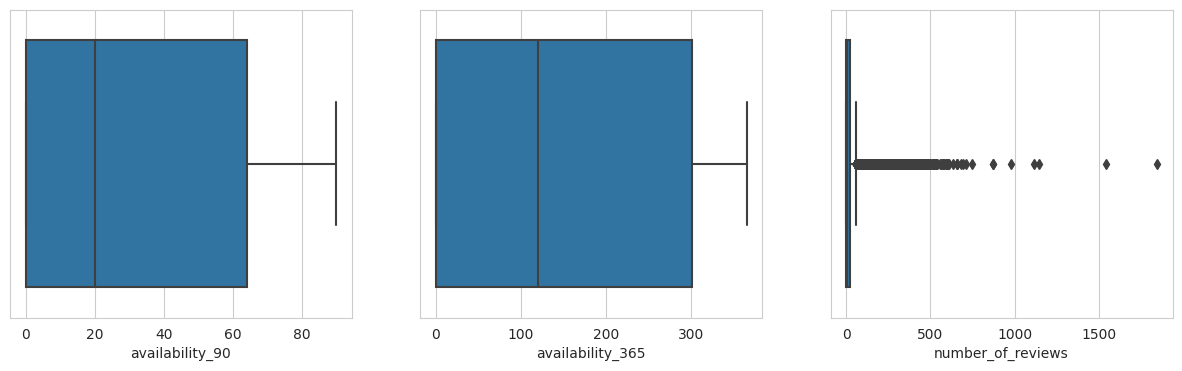

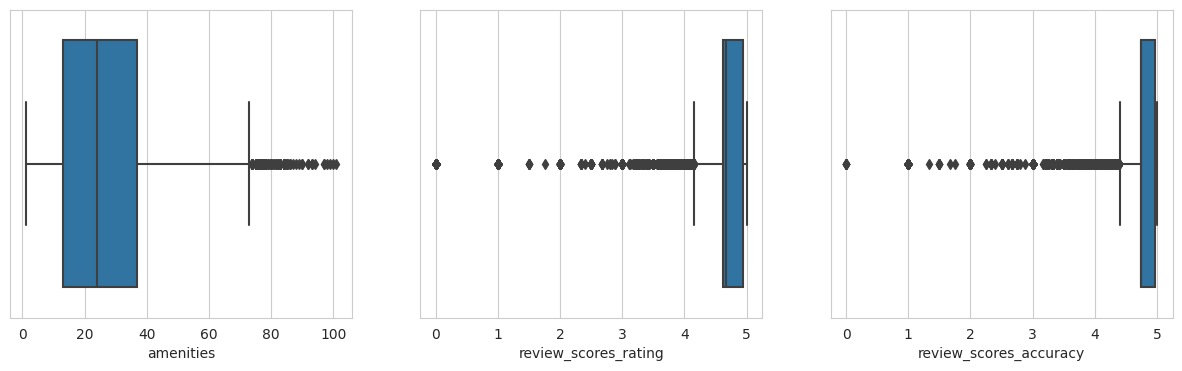

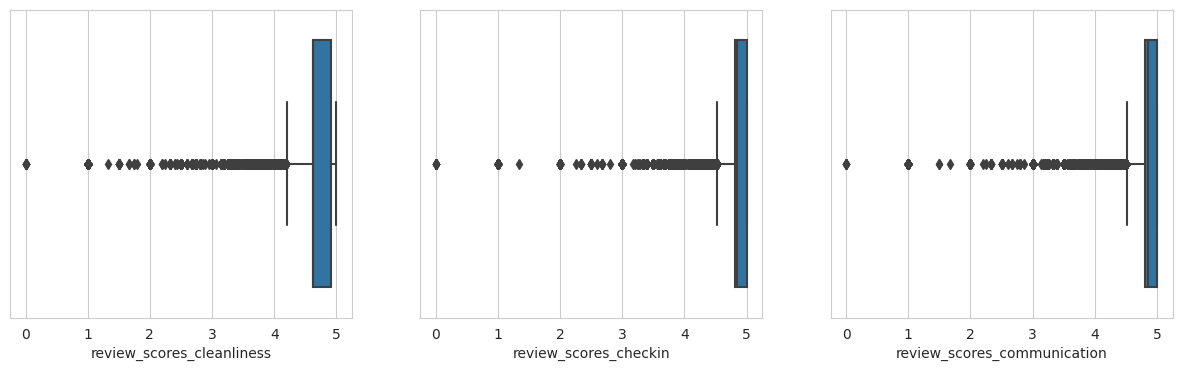

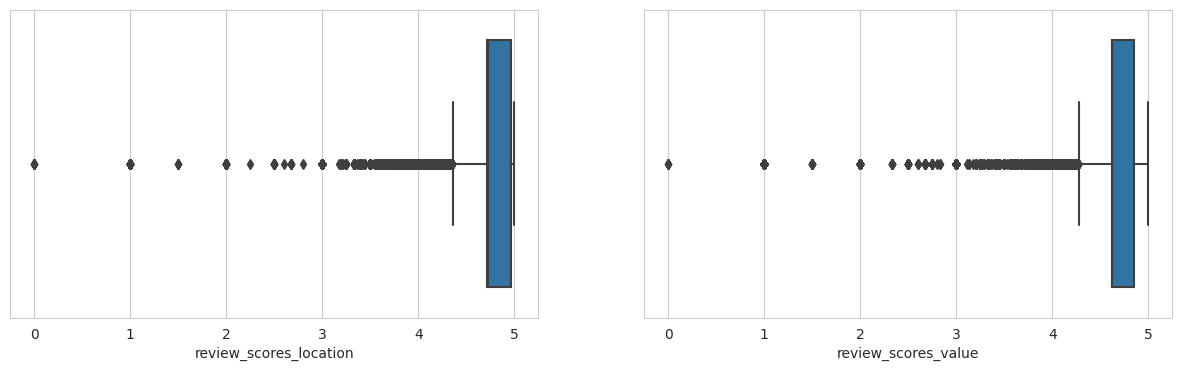

In [ ]:
# 구간변수 이상값 확인 및 제거

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'host_response_rate', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'latitude', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'longitude', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'accommodates', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'bedrooms', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'beds', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'availability_90', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'availability_365', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'number_of_reviews', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'amenities', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_rating', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'review_scores_accuracy', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_cleanliness', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_checkin', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'review_scores_communication', data = delete_columns_data)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_location', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_value', data = delete_columns_data)


In [ ]:
#host_response_rate, accommodates, bedrooms, beds의 이상치를 하한값과 상한값으로 대체
#나머지 변수들은 이상치 처리X

Q1 = delete_columns_data[['host_response_rate', 'accommodates', 'bedrooms', 'beds']].quantile(0.25)
Q3 = delete_columns_data[['host_response_rate', 'accommodates', 'bedrooms', 'beds']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

host_response_rate    7.442736
accommodates          2.000000
bedrooms              0.591403
beds                  1.000000
dtype: float64


In [ ]:
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
print(Lower)
print(Upper)

host_response_rate    81.393161
accommodates          -1.000000
bedrooms               0.112895
beds                  -0.500000
dtype: float64
host_response_rate    111.164103
accommodates            7.000000
bedrooms                2.478508
beds                    3.500000
dtype: float64


In [ ]:
delete_columns_data['host_response_rate'] = delete_columns_data['host_response_rate'].apply(lambda x: 82 if x < 82 else x)
delete_columns_data['accommodates'] = delete_columns_data['accommodates'].apply(lambda x: 7 if x > 7 else x)
delete_columns_data['bedrooms'] = delete_columns_data['bedrooms'].apply(lambda x: 2.478508 if x > 2.478508 else x)
delete_columns_data['beds'] = delete_columns_data['beds'].apply(lambda x: 3.5 if x > 3.5 else x)

In [ ]:
delete_columns_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/preprocessing_completed.csv', index = False)

탐색적 자료 분석 및 시각화

결측값이 50% 초과인 변수 제거

In [ ]:
import pandas as pd

#결측값이 50% 초과인 변수는 전처리 과정에서 수행했으므로 미조치
preprocessing_completed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/preprocessing_completed.csv')
preprocessing_completed['price_B'] = preprocessing_completed['price_B'].astype('object')
preprocessing_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

구간 변수 요약 통계 검토

In [ ]:
#요약 통계가 필요 없는 id, latitude, longitude 변수는 제거하고 검토
interval_variable = preprocessing_completed[['host_response_rate', 'accommodates', 'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                                            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
interval_variable.describe()

,host_response_rate,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000
mean,95.077469,2.780568,1.516860,1.554757,26.322994,32.874039,148.848284,25.373135,4.626053,4.740621,4.623132,4.811376,4.805671,4.724157,4.621473
std,5.415922,1.624631,0.446453,0.811567,15.690079,34.844344,142.250654,55.877476,0.636900,0.412740,0.476852,0.359257,0.385890,0.357005,0.445515
min,82.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.557264,2.000000,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000,4.625896,4.740582,4.622926,4.811373,4.805698,4.720000,4.621431
50%,94.000000,2.000000,1.591403,1.000000,24.000000,20.000000,120.000000,4.000000,4.670000,4.750000,4.622926,4.840000,4.860000,4.724220,4.621431
75%,100.000000,4.000000,1.591403,2.000000,37.000000,64.000000,301.000000,24.000000,4.940000,4.970000,4.910000,5.000000,5.000000,4.960000,4.850000
max,100.000000,7.000000,2.478508,3.500000,101.000000,90.000000,365.000000,1843.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#구간 변수 왜도 확인
interval_variable.skew()

host_response_rate            -0.945186
accommodates                   1.137820
bedrooms                       0.429585
beds                           1.223861
amenities                      0.702635
availability_90                0.446489
availability_365               0.278259
number_of_reviews              5.797354
review_scores_rating          -5.266428
review_scores_accuracy        -5.466128
review_scores_cleanliness     -3.974320
review_scores_checkin         -6.593173
review_scores_communication   -6.247293
review_scores_location        -4.989087
review_scores_value           -4.309320
dtype: float64

In [ ]:

#로그 변환 및 boxcox 변환
import numpy as np
import pandas as pd
from scipy.stats import boxcox


#로그 변환 및 boxcox 변환
interval_variable['number_of_reviews'] = np.log(interval_variable['number_of_reviews'] + 1)
interval_variable['review_scores_rating'] = pd.Series(boxcox(interval_variable['review_scores_rating'] + 0.1)[0])
interval_variable['review_scores_accuracy'] = pd.Series(boxcox(interval_variable['review_scores_accuracy'] + 0.1)[0])
interval_variable['review_scores_cleanliness'] = pd.Series(boxcox(interval_variable['review_scores_cleanliness'] + 0.1)[0])
interval_variable['review_scores_checkin'] = pd.Series(boxcox(interval_variable['review_scores_checkin'] + 0.1)[0])
interval_variable['review_scores_communication'] = pd.Series(boxcox(interval_variable['review_scores_communication'] + 0.1)[0])
interval_variable['review_scores_location'] = pd.Series(boxcox(interval_variable['review_scores_location'] + 0.1)[0])
interval_variable['review_scores_value'] = pd.Series(boxcox(interval_variable['review_scores_value'] + 0.1)[0])
# skewness 확인
interval_variable.skew()

<ipython-input-228-7be3032669ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_variable['number_of_reviews'] = np.log(interval_variable['number_of_reviews'] + 1)
<ipython-input-228-7be3032669ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_variable['review_scores_rating'] = pd.Series(boxcox(interval_variable['review_scores_rating'] + 0.1)[0])
<ipython-input-228-7be3032669ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

host_response_rate            -0.945186
accommodates                   1.137820
bedrooms                       0.429585
beds                           1.223861
amenities                      0.702635
availability_90                0.446489
availability_365               0.278259
number_of_reviews              0.465076
review_scores_rating          -1.014617
review_scores_accuracy        -0.500392
review_scores_cleanliness     -0.368958
review_scores_checkin         -0.607583
review_scores_communication   -0.672716
review_scores_location        -0.303455
review_scores_value           -0.282326
dtype: float64

In [ ]:
interval_variable.kurtosis()

host_response_rate             0.221320
accommodates                   0.476822
bedrooms                      -0.516221
beds                           0.197015
amenities                     -0.096265
availability_90               -1.426175
availability_365              -1.569642
number_of_reviews             -0.909421
review_scores_rating           1.416735
review_scores_accuracy        -0.162085
review_scores_cleanliness     -0.302378
review_scores_checkin         -0.117557
review_scores_communication   -0.095757
review_scores_location        -0.379508
review_scores_value           -0.018438
dtype: float64

구간 변수 상관관계 검토

In [ ]:
round(interval_variable.corr(), 2)

,host_response_rate,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
host_response_rate,1.00,0.09,0.06,0.10,0.27,0.11,0.14,0.14,0.10,0.06,0.10,0.06,0.09,-0.01,0.04
accommodates,0.09,1.00,0.49,0.78,0.23,0.12,0.13,0.08,0.01,-0.02,0.03,-0.02,-0.01,-0.03,-0.03
bedrooms,0.06,0.49,1.00,0.57,0.13,0.09,0.10,0.03,0.00,-0.02,-0.00,-0.00,-0.01,-0.07,-0.00
beds,0.10,0.78,0.57,1.00,0.25,0.12,0.14,0.11,0.02,-0.01,0.04,0.00,0.01,-0.04,-0.00
amenities,0.27,0.23,0.13,0.25,1.00,0.29,0.31,0.39,0.23,0.15,0.23,0.13,0.15,0.02,0.12
availability_90,0.11,0.12,0.09,0.12,0.29,1.00,0.72,0.13,0.01,-0.08,0.04,-0.07,-0.08,-0.12,-0.08
availability_365,0.14,0.13,0.10,0.14,0.31,0.72,1.00,0.11,0.01,-0.08,0.04,-0.06,-0.08,-0.10,-0.10
number_of_reviews,0.14,0.08,0.03,0.11,0.39,0.13,0.11,1.00,0.20,0.13,0.17,0.12,0.15,0.02,0.13
review_scores_rating,0.10,0.01,0.00,0.02,0.23,0.01,0.01,0.20,1.00,0.73,0.69,0.61,0.66,0.46,0.71
review_scores_accuracy,0.06,-0.02,-0.02,-0.01,0.15,-0.08,-0.08,0.13,0.73,1.00,0.65,0.63,0.65,0.46,0.70


구간 변수 기초 통계량 및 시각화

기초 통계량

In [ ]:
interval_variable = preprocessing_completed[['host_response_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                                            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']]
interval_variable.describe()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000
mean,95.077469,40.729383,-73.945808,2.780568,1.516860,1.554757,26.322994,32.874039,148.848284,25.373135,4.626053,4.740621,4.623132,4.811376,4.805671,4.724157,4.621473,215.959381
std,5.415922,0.056735,0.055128,1.624631,0.446453,0.811567,15.690079,34.844344,142.250654,55.877476,0.636900,0.412740,0.476852,0.359257,0.385890,0.357005,0.445515,496.167553
min,82.000000,40.500314,-74.251907,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,92.557264,40.688790,-73.982800,2.000000,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000,4.625896,4.740582,4.622926,4.811373,4.805698,4.720000,4.621431,79.000000
50%,94.000000,40.726275,-73.953870,2.000000,1.591403,1.000000,24.000000,20.000000,120.000000,4.000000,4.670000,4.750000,4.622926,4.840000,4.860000,4.724220,4.621431,135.000000
75%,100.000000,40.762690,-73.926191,4.000000,1.591403,2.000000,37.000000,64.000000,301.000000,24.000000,4.940000,4.970000,4.910000,5.000000,5.000000,4.960000,4.850000,225.000000
max,100.000000,40.911380,-73.713650,7.000000,2.478508,3.500000,101.000000,90.000000,365.000000,1843.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30000.000000


시각화 - 박스 플롯으로 변수의 분포 확인

<Axes: xlabel='review_scores_value'>

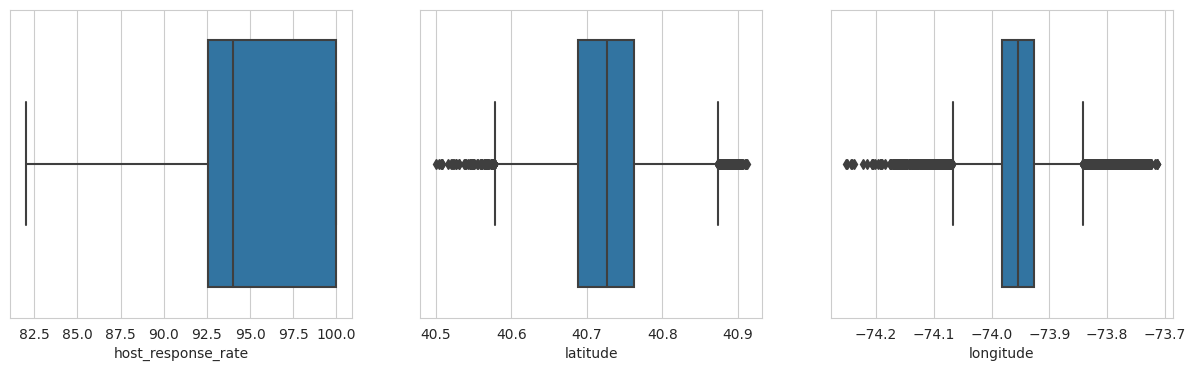

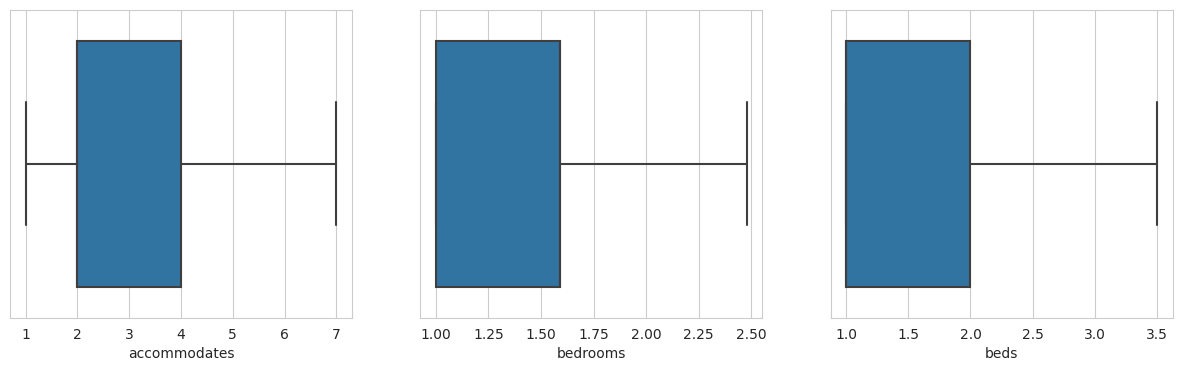

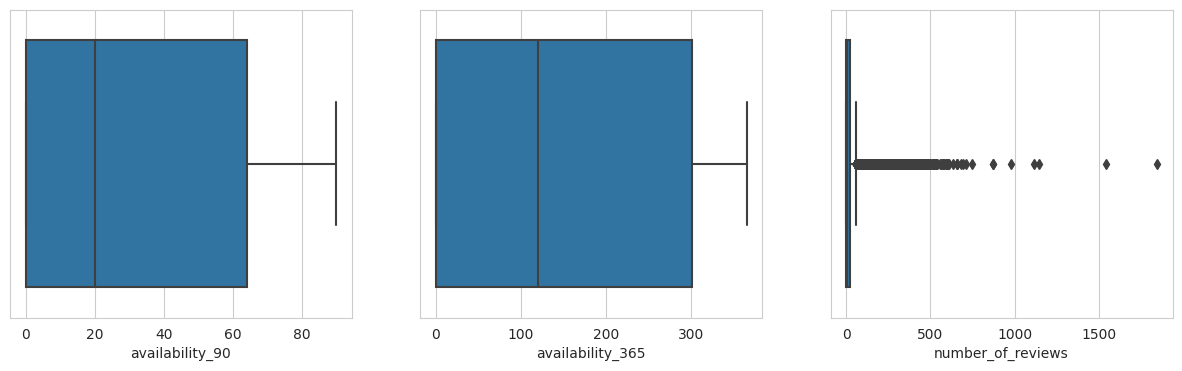

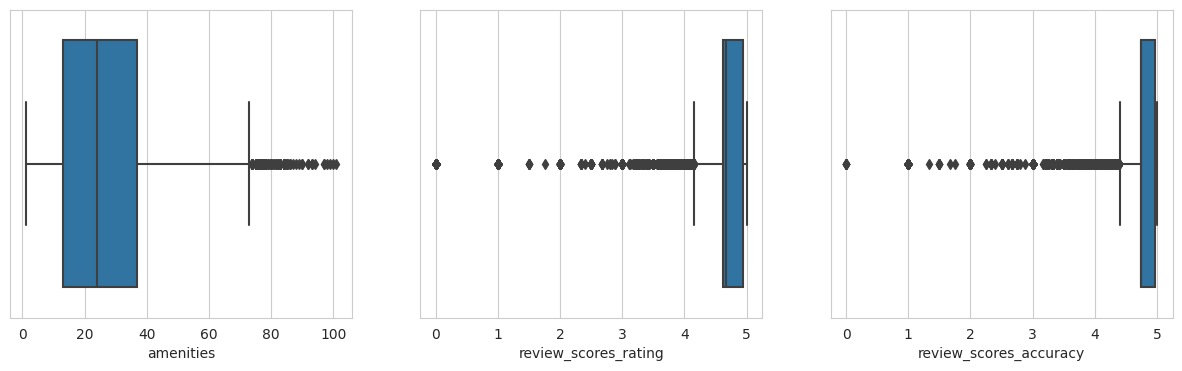

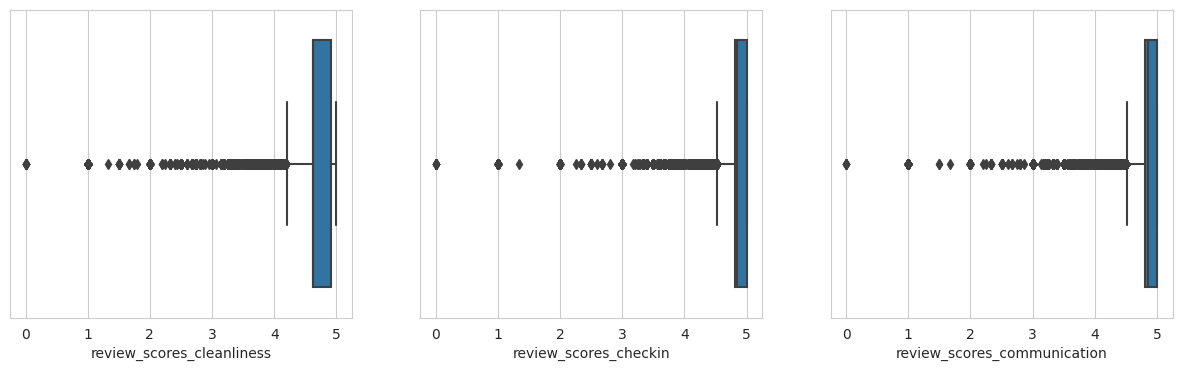

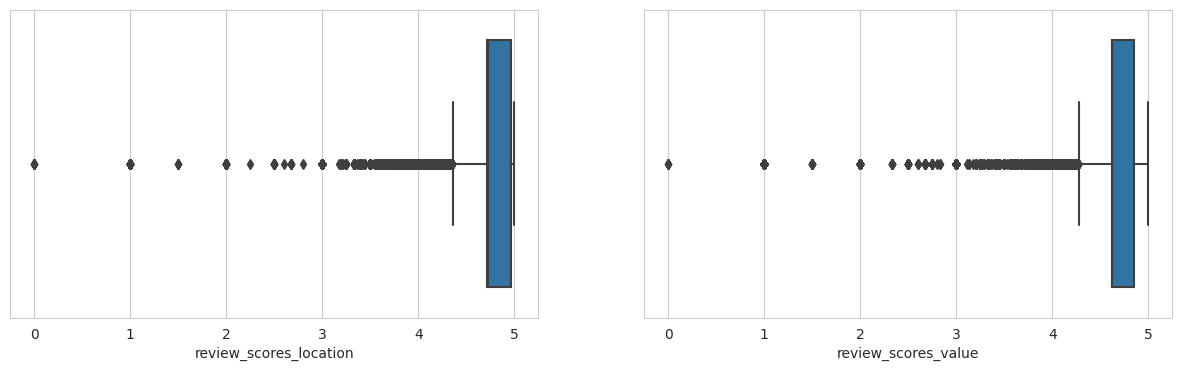

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'host_response_rate', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'latitude', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'longitude', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'accommodates', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'bedrooms', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'beds', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'availability_90', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'availability_365', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'number_of_reviews', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'amenities', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'review_scores_rating', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'review_scores_accuracy', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_cleanliness', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'review_scores_checkin', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'review_scores_communication', data = interval_variable)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_location', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'review_scores_value', data = interval_variable)

시각화2 - 히트맵으로 상관계수 관계 확인

<Axes: >

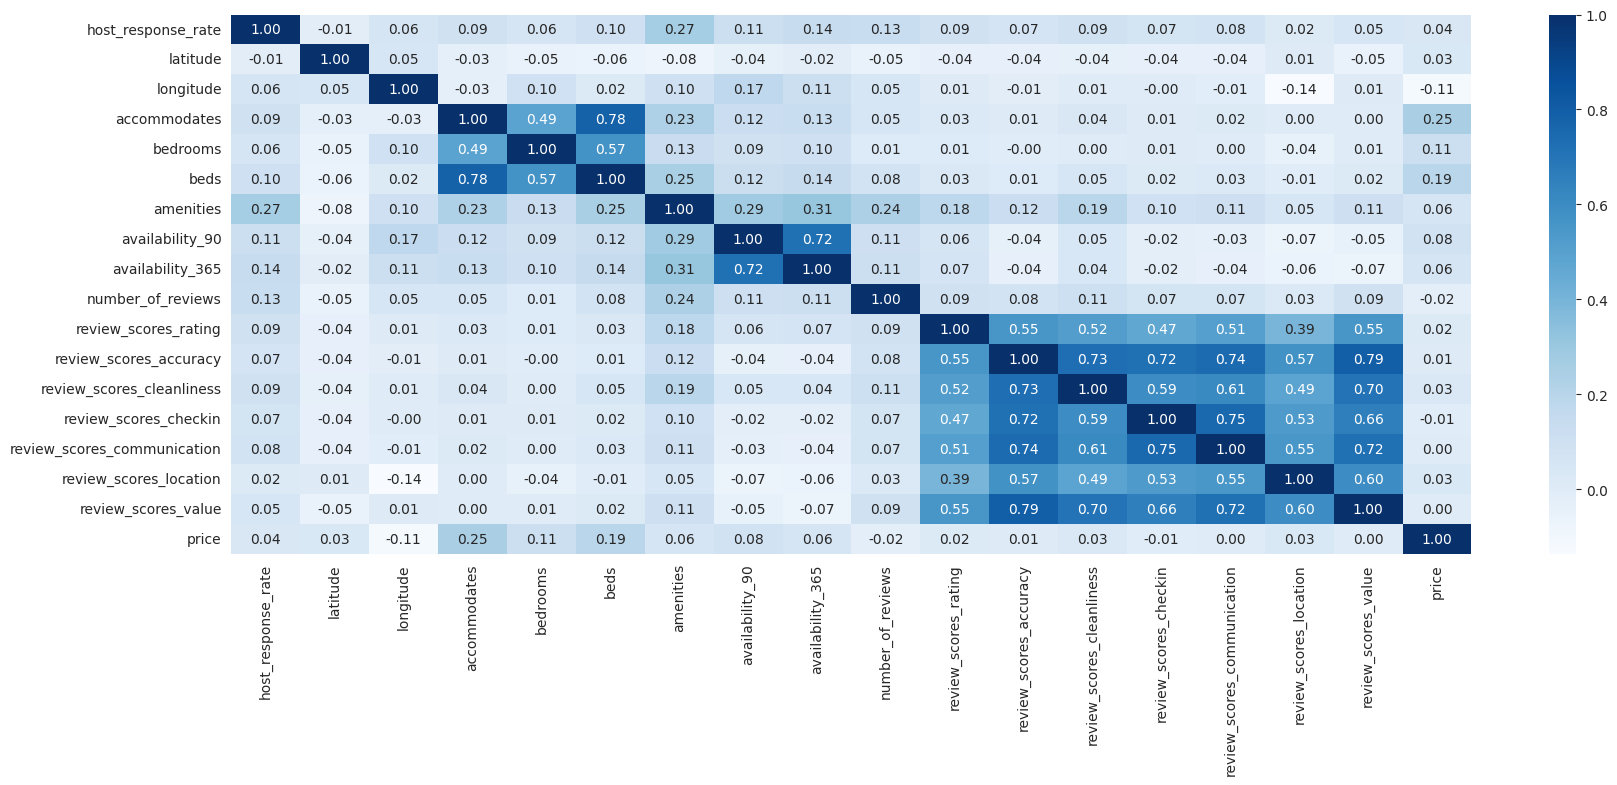

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(interval_variable.corr(), annot=True, fmt=".2f", cmap="Blues")

범주형 변수 시각화

시각화 3 - 막대그래프로 변수 구성 확인

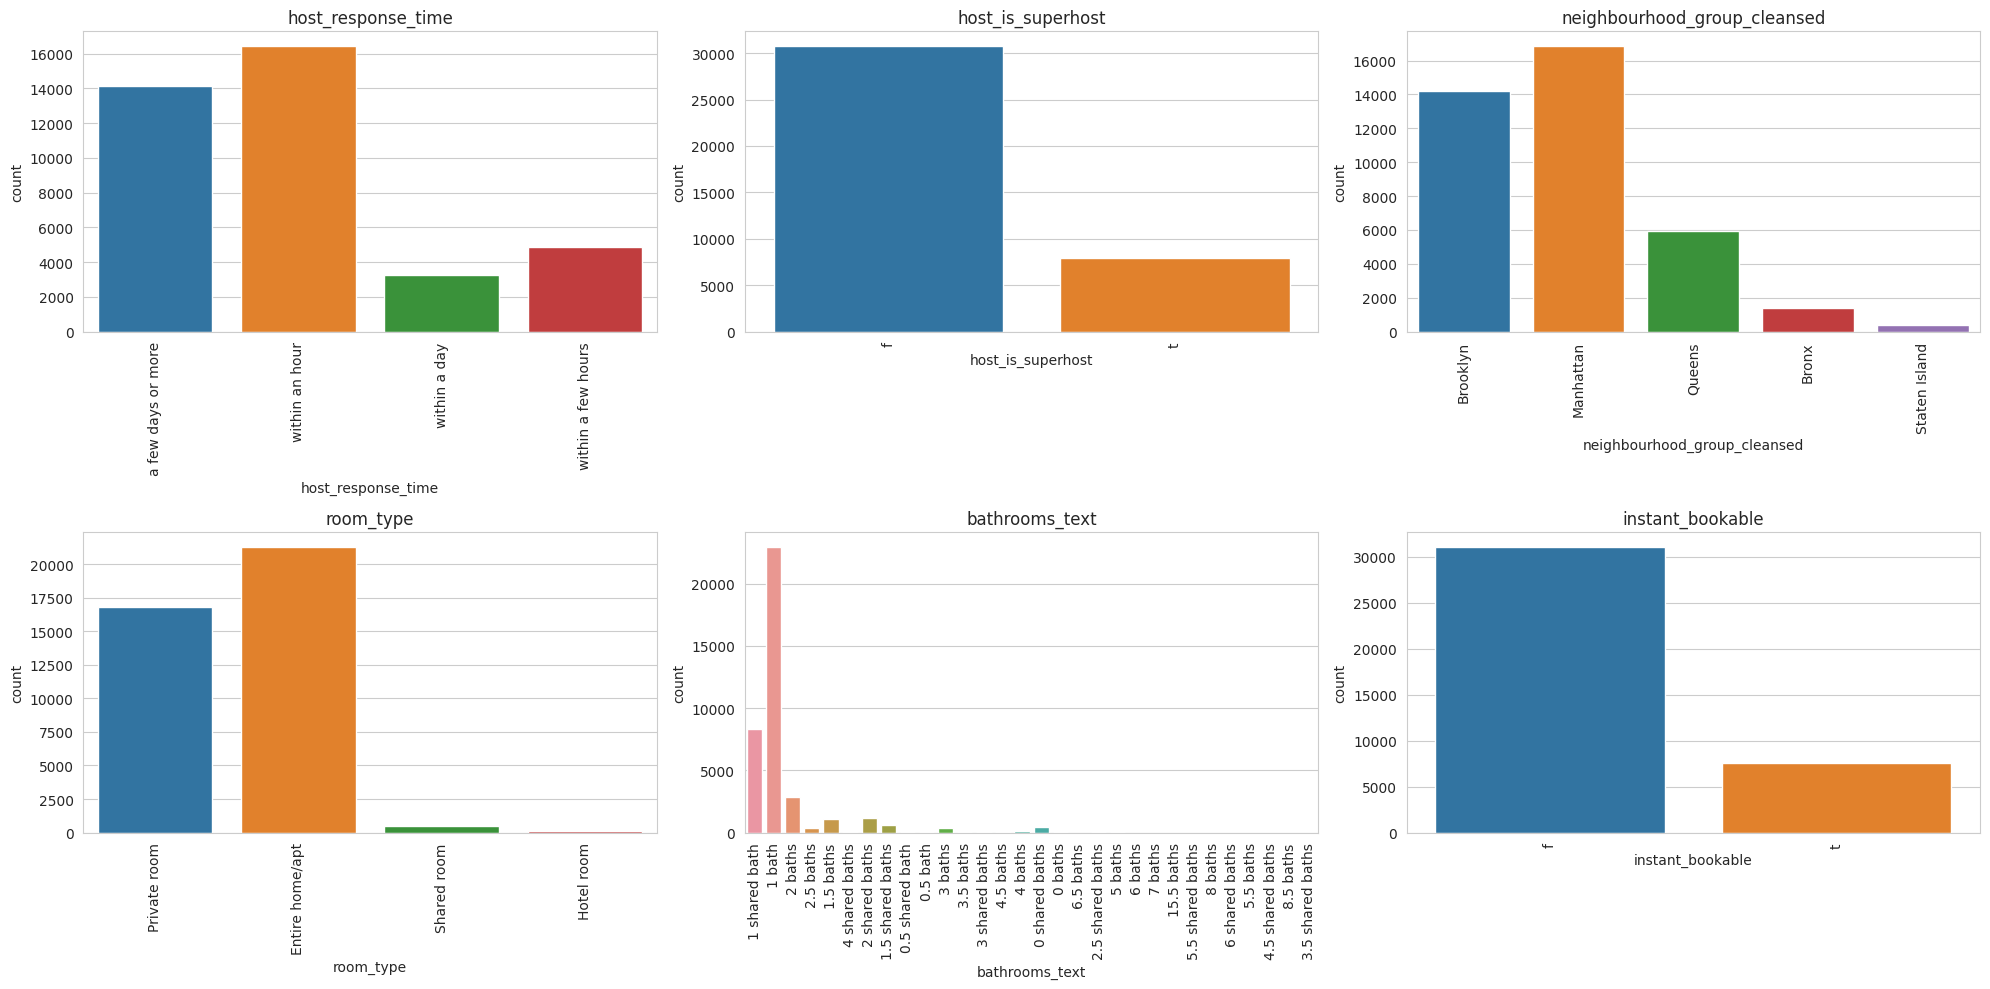

In [ ]:
categorical_variable = preprocessing_completed[['host_response_time', 'host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'bathrooms_text', 'instant_bookable', 'price_B']]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(categorical_variable.columns[:-1]):
    sns.countplot(x=col, data=categorical_variable, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

In [ ]:
#host_response_time
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['host_response_time'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['host_response_time'], categorical_variable['price_B'], normalize=True))

col_0               count
host_response_time       
a few days or more  14117
within a day         3267
within a few hours   4900
within an hour      16466

price_B                  0.0       1.0
host_response_time                    
a few days or more  0.212155  0.152155
within a day        0.042039  0.042271
within a few hours  0.070632  0.055819
within an hour      0.173677  0.251252


In [ ]:
#host_is_superhost
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['host_is_superhost'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['host_is_superhost'], categorical_variable['price_B'], normalize=True))

col_0              count
host_is_superhost       
f                  30804
t                   7946

price_B                 0.0       1.0
host_is_superhost                    
f                  0.404955  0.389987
t                  0.093548  0.111510


In [ ]:
#neighbourhood_group_cleansed
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['neighbourhood_group_cleansed'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['neighbourhood_group_cleansed'], categorical_variable['price_B'], normalize=True))

col_0                         count
neighbourhood_group_cleansed       
Bronx                          1373
Brooklyn                      14177
Manhattan                     16882
Queens                         5946
Staten Island                   372

price_B                            0.0       1.0
neighbourhood_group_cleansed                    
Bronx                         0.025884  0.009548
Brooklyn                      0.212981  0.152877
Manhattan                     0.144516  0.291148
Queens                        0.108387  0.045058
Staten Island                 0.006735  0.002865


In [ ]:
#room_type
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['room_type'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['room_type'], categorical_variable['price_B'], normalize=True))

col_0            count
room_type             
Entire home/apt  21311
Hotel room         129
Private room     16818
Shared room        492

price_B               0.0       1.0
room_type                          
Entire home/apt  0.145084  0.404877
Hotel room       0.000000  0.003329
Private room     0.343794  0.090219
Shared room      0.009626  0.003071


In [ ]:
#bathrooms_text
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['bathrooms_text'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['bathrooms_text'], categorical_variable['price_B'], normalize=True))

col_0             count
bathrooms_text         
0 baths              59
0 shared baths      446
0.5 bath             54
0.5 shared bath      13
1 bath            22974
1 shared bath      8306
1.5 baths          1092
1.5 shared baths    613
15.5 baths            1
2 baths            2830
2 shared baths     1144
2.5 baths           367
2.5 shared baths     72
3 baths             382
3 shared baths       83
3.5 baths            79
3.5 shared baths      1
4 baths             133
4 shared baths       30
4.5 baths            36
4.5 shared baths      2
5 baths              14
5.5 baths             3
5.5 shared baths      1
6 baths               6
6 shared baths        1
6.5 baths             5
7 baths               1
8 baths               1
8.5 baths             1

price_B                0.0       1.0
bathrooms_text                      
0 baths           0.000568  0.000955
0 shared baths    0.009497  0.002013
0.5 bath          0.000723  0.000671
0.5 shared bath   0.000335  0.000000
1 bath   

In [ ]:
#instant_bookable
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['instant_bookable'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['instant_bookable'], categorical_variable['price_B'], normalize=True))

col_0             count
instant_bookable       
f                 31128
t                  7622

price_B                0.0       1.0
instant_bookable                    
f                 0.422865  0.380439
t                 0.075639  0.121058


구간 변수 t검정

In [ ]:
from scipy import stats
# host_response_rate t-검정
data_host_response_rate_1 = interval_variable[categorical_variable['price_B'] == 1]['host_response_rate']
data_host_response_rate_0 = interval_variable[categorical_variable['price_B'] == 0]['host_response_rate']

stats.ttest_ind(data_host_response_rate_1, data_host_response_rate_0)

TtestResult(statistic=17.308295410091635, pvalue=7.273842649171194e-67, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 host_response_rate는 서로 다르다

In [ ]:
# accommodates t-검정
data_accommodates_1 = interval_variable[categorical_variable['price_B'] == 1]['accommodates']
data_accommodates_0 = interval_variable[categorical_variable['price_B'] == 0]['accommodates']

stats.ttest_ind(data_accommodates_1, data_accommodates_0)

TtestResult(statistic=105.85739454056018, pvalue=0.0, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 accommodates는 서로 다르다

In [ ]:
# bedrooms t-검정
data_bedrooms_1 = interval_variable[categorical_variable['price_B'] == 1]['bedrooms']
data_bedrooms_0 = interval_variable[categorical_variable['price_B'] == 0]['bedrooms']

stats.ttest_ind(data_bedrooms_1, data_bedrooms_0)

TtestResult(statistic=22.75898836015731, pvalue=6.544556451836452e-114, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 bedrooms는 서로 다르다

In [ ]:
# beds t-검정
data_beds_1 = interval_variable[categorical_variable['price_B'] == 1]['beds']
data_beds_0 = interval_variable[categorical_variable['price_B'] == 0]['beds']

stats.ttest_ind(data_beds_1, data_beds_0)

TtestResult(statistic=80.90038738032332, pvalue=0.0, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 beds는 서로 다르다

In [ ]:
# amenities t-검정
data_amenities_1 = interval_variable[categorical_variable['price_B'] == 1]['amenities']
data_amenities_0 = interval_variable[categorical_variable['price_B'] == 0]['amenities']

stats.ttest_ind(data_amenities_1, data_amenities_0)

TtestResult(statistic=45.84341552975711, pvalue=0.0, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 amenities는 서로 다르다

In [ ]:
# availability_90 t-검정
data_availability_90_1 = interval_variable[categorical_variable['price_B'] == 1]['availability_90']
data_availability_90_0 = interval_variable[categorical_variable['price_B'] == 0]['availability_90']

stats.ttest_ind(data_availability_90_1, data_availability_90_0)

TtestResult(statistic=27.107036259943715, pvalue=2.5611462816654945e-160, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 availability_90은 서로 다르다

In [ ]:
# availability_365 t-검정
data_aavailability_365_1 = interval_variable[categorical_variable['price_B'] == 1]['availability_365']
data_availability_365_0 = interval_variable[categorical_variable['price_B'] == 0]['availability_365']

stats.ttest_ind(data_aavailability_365_1, data_availability_365_0)

TtestResult(statistic=30.86722540160335, pvalue=1.0598580458310697e-206, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 availability_365는 서로 다르다

In [ ]:
# number_of_reviews t-검정
data_number_of_reviews_1 = interval_variable[categorical_variable['price_B'] == 1]['number_of_reviews']
data_number_of_reviews_0 = interval_variable[categorical_variable['price_B'] == 0]['number_of_reviews']

stats.ttest_ind(data_number_of_reviews_1, data_number_of_reviews_0)

TtestResult(statistic=2.990068334137311, pvalue=0.0027909018290161337, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 number_of_reviews는 서로 다르다

In [ ]:
# review_scores_rating t-검정
data_review_scores_rating_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_rating']
data_review_scores_rating_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_rating']

stats.ttest_ind(data_review_scores_rating_1, data_review_scores_rating_0)

TtestResult(statistic=13.298682367725586, pvalue=2.8873962495611256e-40, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_rating은 서로 다르다

In [ ]:
# review_scores_accuracy t-검정
data_review_scores_accuracy_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_accuracy']
data_review_scores_accuracy_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_accuracy']

stats.ttest_ind(data_review_scores_accuracy_1, data_review_scores_accuracy_0)

TtestResult(statistic=8.2313534256371, pvalue=1.908337272185342e-16, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_accuracy는 서로 다르다

In [ ]:
# review_scores_cleanliness t-검정
data_review_scores_cleanliness_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_cleanliness']
data_review_scores_cleanliness_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_cleanliness']

stats.ttest_ind(data_review_scores_cleanliness_1, data_review_scores_cleanliness_0)

TtestResult(statistic=19.117299718496696, pvalue=4.287926451071487e-81, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_cleanliness는 서로 다르다

In [ ]:
# review_scores_checkin t-검정
data_review_scores_checkin_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_checkin']
data_review_scores_checkin_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_checkin']

stats.ttest_ind(data_review_scores_checkin_1, data_review_scores_checkin_0)

TtestResult(statistic=4.607397096367092, pvalue=4.090377500932186e-06, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_checkin은 서로 다르다

In [ ]:
# review_scores_communication t-검정
data_review_scores_communication_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_communication']
data_review_scores_communication_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_communication']

stats.ttest_ind(data_review_scores_communication_1, data_review_scores_communication_0)

TtestResult(statistic=6.143368601205813, pvalue=8.157416634113921e-10, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_communication은 서로 다르다

In [ ]:
# review_scores_location t-검정
data_review_scores_location_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_location']
data_review_scores_location_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_location']

stats.ttest_ind(data_review_scores_location_1, data_review_scores_location_0)

TtestResult(statistic=20.22835793130179, pvalue=1.619460337688526e-90, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_location은 서로 다르다

In [ ]:
# review_scores_value t-검정
data_review_scores_value_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_value']
data_review_scores_value_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_value']

stats.ttest_ind(data_review_scores_value_1, data_review_scores_value_0)

TtestResult(statistic=0.6835163029902508, pvalue=0.4942847391351013, df=38748.0)

review_scores_value 변수만 귀무가설 채택 - 두 그룹별의 평균 점수는 차이가 없으므로 review_scores_value는 price_B 변수에 영향을 미칠 가능성이 작다

머신러닝 모델 수립


결정 트리, 로지스틱 회귀, 신경망 모델, K-최근접 이웃, 랜덤 포레스트, 그레디언트 부스팅, Lasso, SVM, XGBoost, LightGBM, 앙상블 등 여러 모델을 사용하여 가장 높은 정확도를 가지고 있는 모델 판별

머신 러닝 모델 실행

In [ ]:
#구간 변수 데이터프레임에 price변수 추가 후 최종 확인
interval_variable['price'] = preprocessing_completed['price']
print(interval_variable.info())
print(categorical_variable.info())

interval_variable.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/interval_variable.csv', index = False)
categorical_variable.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/categorical_variable.csv', index = False)

<ipython-input-256-34a906266175>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_variable['price'] = preprocessing_completed['price']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           38750 non-null  float64
 1   latitude                     38750 non-null  float64
 2   longitude                    38750 non-null  float64
 3   accommodates                 38750 non-null  int64  
 4   bedrooms                     38750 non-null  float64
 5   beds                         38750 non-null  float64
 6   amenities                    38750 non-null  int64  
 7   availability_90              38750 non-null  int64  
 8   availability_365             38750 non-null  int64  
 9   number_of_reviews            38750 non-null  int64  
 10  review_scores_rating         38750 non-null  float64
 11  review_scores_accuracy       38750 non-null  float64
 12  review_scores_cleanliness    38750 non-null  float64
 13  review_scores_ch

In [ ]:
#변환완료한 연속형 변수와 범주형 변수를 하나로 합치고 저장
import pandas as pd

transformation_completed = pd.concat([interval_variable, categorical_variable], axis=1)
print(transformation_completed.info())
transformation_completed.head()
transformation_completed.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/transformation_completed.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            38750 non-null  float64
 1   latitude                      38750 non-null  float64
 2   longitude                     38750 non-null  float64
 3   accommodates                  38750 non-null  int64  
 4   bedrooms                      38750 non-null  float64
 5   beds                          38750 non-null  float64
 6   amenities                     38750 non-null  int64  
 7   availability_90               38750 non-null  int64  
 8   availability_365              38750 non-null  int64  
 9   number_of_reviews             38750 non-null  int64  
 10  review_scores_rating          38750 non-null  float64
 11  review_scores_accuracy        38750 non-null  float64
 12  review_scores_cleanliness     38750 non-null  float64
 13  r

결정 트리 분류 모델

In [ ]:
!pip install -U imbalanced-learn
!pip install graphviz

In [ ]:
# OrdinalEncoder를 import하여 범주형 데이터 변환
df_decisiontree = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/transformation_completed.csv')
from sklearn.preprocessing import OrdinalEncoder
df_decisiontree['host_response_time_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['host_response_time'].values.reshape(-1,1))
df_decisiontree['host_is_superhost_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['host_is_superhost'].values.reshape(-1,1))
df_decisiontree['neighbourhood_group_cleansed_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['neighbourhood_group_cleansed'].values.reshape(-1,1))
df_decisiontree['room_type_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['room_type'].values.reshape(-1,1))
df_decisiontree['bathrooms_text_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['bathrooms_text'].values.reshape(-1,1))
df_decisiontree['instant_bookable_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['instant_bookable'].values.reshape(-1,1))
df_decisiontree.head(3)

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,room_type,bathrooms_text,instant_bookable,price_B,host_response_time_encoded,host_is_superhost_encoded,neighbourhood_group_cleansed_encoded,room_type_encoded,bathrooms_text_encoded,instant_bookable_encoded
0,92.557264,40.68457,-73.91181,1,1.591403,1.0,23,89,364,5,...,Private room,1 shared bath,f,0.0,0.0,0.0,1.0,2.0,5.0,0.0
1,92.557264,40.76878,-73.98719,2,1.000000,1.0,6,0,0,0,...,Private room,1 bath,f,0.0,0.0,0.0,2.0,2.0,4.0,0.0
2,92.557264,40.74343,-73.91865,1,1.591403,1.0,11,0,0,0,...,Entire home/apt,1 bath,f,0.0,0.0,0.0,3.0,0.0,4.0,0.0


In [ ]:
df_decisiontree.groupby(['host_response_time', 'host_response_time_encoded']).size()

host_response_time  host_response_time_encoded
a few days or more  0.0                           14117
within a day        1.0                            3267
within a few hours  2.0                            4900
within an hour      3.0                           16466
dtype: int64

In [ ]:
df_decisiontree.groupby(['host_is_superhost', 'host_is_superhost_encoded']).size()

host_is_superhost  host_is_superhost_encoded
f                  0.0                          30804
t                  1.0                           7946
dtype: int64

In [ ]:
df_decisiontree.groupby(['neighbourhood_group_cleansed', 'neighbourhood_group_cleansed_encoded']).size()

neighbourhood_group_cleansed  neighbourhood_group_cleansed_encoded
Bronx                         0.0                                      1373
Brooklyn                      1.0                                     14177
Manhattan                     2.0                                     16882
Queens                        3.0                                      5946
Staten Island                 4.0                                       372
dtype: int64

In [ ]:
df_decisiontree.groupby(['room_type', 'room_type_encoded']).size()

room_type        room_type_encoded
Entire home/apt  0.0                  21311
Hotel room       1.0                    129
Private room     2.0                  16818
Shared room      3.0                    492
dtype: int64

In [ ]:
df_decisiontree.groupby(['bathrooms_text', 'bathrooms_text_encoded']).size()

bathrooms_text    bathrooms_text_encoded
0 baths           0.0                          59
0 shared baths    1.0                         446
0.5 bath          2.0                          54
0.5 shared bath   3.0                          13
1 bath            4.0                       22974
1 shared bath     5.0                        8306
1.5 baths         6.0                        1092
1.5 shared baths  7.0                         613
15.5 baths        8.0                           1
2 baths           9.0                        2830
2 shared baths    10.0                       1144
2.5 baths         11.0                        367
2.5 shared baths  12.0                         72
3 baths           13.0                        382
3 shared baths    14.0                         83
3.5 baths         15.0                         79
3.5 shared baths  16.0                          1
4 baths           17.0                        133
4 shared baths    18.0                         30
4.5 baths

In [ ]:
df_decisiontree.groupby(['instant_bookable', 'instant_bookable_encoded']).size()

instant_bookable  instant_bookable_encoded
f                 0.0                         31128
t                 1.0                          7622
dtype: int64

In [ ]:
# 기존 범주형 변수 열 삭제
df_decisiontree.drop(['host_response_time', 'host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'bathrooms_text', 'instant_bookable'], axis=1,inplace=True)
df_decisiontree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   host_response_rate                    38750 non-null  float64
 1   latitude                              38750 non-null  float64
 2   longitude                             38750 non-null  float64
 3   accommodates                          38750 non-null  int64  
 4   bedrooms                              38750 non-null  float64
 5   beds                                  38750 non-null  float64
 6   amenities                             38750 non-null  int64  
 7   availability_90                       38750 non-null  int64  
 8   availability_365                      38750 non-null  int64  
 9   number_of_reviews                     38750 non-null  int64  
 10  review_scores_rating                  38750 non-null  float64
 11  review_scores_a

In [ ]:
#타겟 변수 분할 및 비율 확인
import graphviz
import pandas as pd
import numpy as np

print("df_decisiontree shape : " + str(df_decisiontree.shape))
data_decisiontree = df_decisiontree.drop(['price', 'price_B'], axis=1)
target_decisiontree = df_decisiontree['price_B']
print("data_decisiontree shape : " + str(data_decisiontree.shape))
print("target_decisiontree shape : " + str(target_decisiontree.shape))
df_decisiontree['price_B'].value_counts(dropna=False, normalize=True)

df_decisiontree shape : (38750, 25)
data_decisiontree shape : (38750, 23)
target_decisiontree shape : (38750,)


1.0    0.501497
0.0    0.498503
Name: price_B, dtype: float64

In [ ]:
# 7:3 비율로 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_decisiontree, target_decisiontree, test_size=0.3, random_state=4, stratify=target_decisiontree)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)
y_train.value_counts(normalize=True)

x_train shape :  (27125, 23)
x_test shape :  (11625, 23)
y_train shape :  (27125,)
y_test shape :  (11625,)


1.0    0.501493
0.0    0.498507
Name: price_B, dtype: float64

In [ ]:
# 결정 트리 모델(지니 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Classifier로 DecisionTreeClassifier를 지정
tree = DecisionTreeClassifier(random_state=0)
# Classifier를 학습 데이터세트에서 학습시킴
model = tree.fit(x_train, y_train)
# 학습된 Classifier로 테스트데이터세트의 자료를 이용해서 타겟 변수 예측값을 생성
pred = model.predict(x_test)

print("Accuracy on training set : {:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set : ", accuracy_score(y_test, pred))

Accuracy on training set : 0.99985
Accuracy on test set :  0.7853763440860215


GridSearch를 실행하기 전 정확도 : 0.78538

In [ ]:
# 결정 트리 모델(지니 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=5)

params = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 21)}
grid_tree = GridSearchCV(
    tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_tree.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:0.82282
GridSearchCV best parameter: {'criterion': 'entropy', 'max_depth': 9}


In [ ]:
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.81454


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.81454

bets parameter : {'criterion': 'entropy', 'max_depth': 9}

In [ ]:
# 최적 모델의 변수 중요도 수치 확인
print("Feature importances:")
print(best_clf.feature_importances_)

Feature importances:
[5.78438073e-03 7.22694249e-02 1.58062440e-01 4.68706489e-02
 3.33521511e-02 3.44887749e-02 4.55273414e-02 3.95693367e-02
 2.11123958e-02 9.32530080e-03 2.75423956e-03 2.38694798e-03
 1.41385902e-02 3.02906760e-04 3.83318488e-03 9.22820842e-03
 5.53116693e-03 7.34471921e-03 9.65767568e-04 4.19858472e-04
 3.96535022e-01 6.13725920e-02 2.88246011e-02]


In [ ]:
# 변수명을 리스트 형태로 만들기
feature_names = list(data_decisiontree.columns)
# 변수명을 index로 만들고, feature_importances를 매칭해서 나열한 데이터프레임 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names, columns=['Feature_importances'])
# Feature_importances의 값을 내림차순으로 정리
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1

,Feature_importances
room_type_encoded,0.3965
longitude,0.1581
latitude,0.0723
bathrooms_text_encoded,0.0614
accommodates,0.0469
amenities,0.0455
availability_90,0.0396
beds,0.0345
bedrooms,0.0334
instant_bookable_encoded,0.0288


<Axes: xlabel='Feature_importances'>

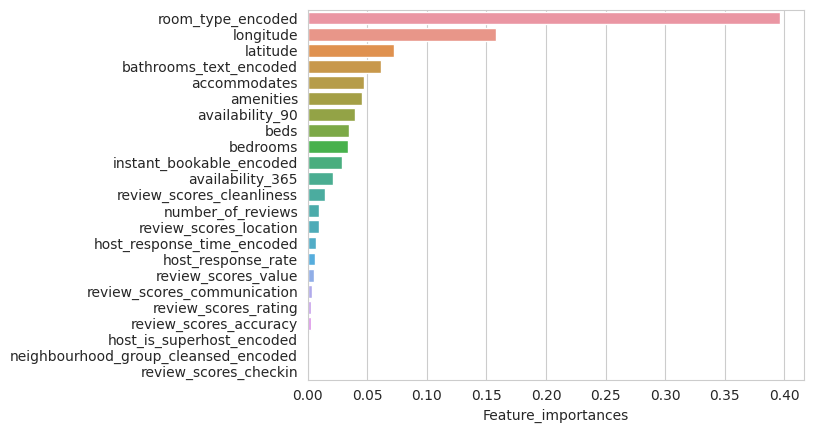

In [ ]:
# 데이터 프레임 df1의 막대그래프 그리기
import seaborn as sns

sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

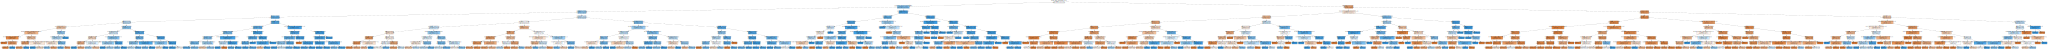

In [ ]:
# graphviz 불러오기
import graphviz
# model의 결과물을 tree.dot에 저장
from sklearn.tree import export_graphviz
export_graphviz(best_clf, out_file="tree.dot", feature_names=list(data_decisiontree.columns), impurity=False, filled=True)

# tree.dot을 graphviz 기능을 통해 출력
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

로지스틱 회귀 분류 모델

In [ ]:
import pandas as pd
df_logisticregerssion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/transformation_completed.csv')
print(df_logisticregerssion.shape)
df_logisticregerssion.head()

(38750, 25)


,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,review_scores_location,review_scores_value,price,host_response_time,host_is_superhost,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable,price_B
0,92.557264,40.68457,-73.91181,1,1.591403,1.0,23,89,364,5,...,4.80000,5.000000,65.0,a few days or more,f,Brooklyn,Private room,1 shared bath,f,0.0
1,92.557264,40.76878,-73.98719,2,1.000000,1.0,6,0,0,0,...,4.72422,4.621431,110.0,a few days or more,f,Manhattan,Private room,1 bath,f,0.0
2,92.557264,40.74343,-73.91865,1,1.591403,1.0,11,0,0,0,...,4.72422,4.621431,99.0,a few days or more,f,Queens,Entire home/apt,1 bath,f,0.0
3,92.557264,40.68180,-73.93121,2,1.000000,1.0,14,0,0,2,...,5.00000,5.000000,70.0,a few days or more,f,Brooklyn,Entire home/apt,1 bath,f,0.0
4,92.557264,40.68209,-73.94279,4,1.000000,2.0,43,35,96,88,...,4.94000,4.920000,170.0,a few days or more,t,Brooklyn,Entire home/apt,1 bath,f,1.0


In [ ]:
# 더미 변수를 만들 필요 없는 host_is_superhost, instant_bookable의 f와 t를 이진값으로 변경

df_logisticregerssion['host_is_superhost'] = df_logisticregerssion['host_is_superhost'].replace({'f': 0, 't': 1})
df_logisticregerssion['instant_bookable'] = df_logisticregerssion['instant_bookable'].replace({'f': 0, 't': 1})
df_logisticregerssion.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,review_scores_location,review_scores_value,price,host_response_time,host_is_superhost,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable,price_B
0,92.557264,40.68457,-73.91181,1,1.591403,1.0,23,89,364,5,...,4.80000,5.000000,65.0,a few days or more,0,Brooklyn,Private room,1 shared bath,0,0.0
1,92.557264,40.76878,-73.98719,2,1.000000,1.0,6,0,0,0,...,4.72422,4.621431,110.0,a few days or more,0,Manhattan,Private room,1 bath,0,0.0
2,92.557264,40.74343,-73.91865,1,1.591403,1.0,11,0,0,0,...,4.72422,4.621431,99.0,a few days or more,0,Queens,Entire home/apt,1 bath,0,0.0
3,92.557264,40.68180,-73.93121,2,1.000000,1.0,14,0,0,2,...,5.00000,5.000000,70.0,a few days or more,0,Brooklyn,Entire home/apt,1 bath,0,0.0
4,92.557264,40.68209,-73.94279,4,1.000000,2.0,43,35,96,88,...,4.94000,4.920000,170.0,a few days or more,1,Brooklyn,Entire home/apt,1 bath,0,1.0


In [ ]:
# 나머지 범주형 변수 더미 변수 생성

col = ['host_response_time', 'neighbourhood_group_cleansed', 'room_type', 'bathrooms_text']
df_logisticregerssion = pd.get_dummies(df_logisticregerssion, columns=col)
df_logisticregerssion.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,bathrooms_text_4.5 shared baths,bathrooms_text_5 baths,bathrooms_text_5.5 baths,bathrooms_text_5.5 shared baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_6.5 baths,bathrooms_text_7 baths,bathrooms_text_8 baths,bathrooms_text_8.5 baths
0,92.557264,40.68457,-73.91181,1,1.591403,1.0,23,89,364,5,...,0,0,0,0,0,0,0,0,0,0
1,92.557264,40.76878,-73.98719,2,1.000000,1.0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92.557264,40.74343,-73.91865,1,1.591403,1.0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92.557264,40.68180,-73.93121,2,1.000000,1.0,14,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,92.557264,40.68209,-73.94279,4,1.000000,2.0,43,35,96,88,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 기준 더미 변수 제거
col = ['host_response_time_a few days or more', 'neighbourhood_group_cleansed_Manhattan', 'room_type_Entire home/apt', 'bathrooms_text_0 baths']
df_logisticregerssion.drop(col, axis=1, inplace=True)
df_logisticregerssion.shape

(38750, 60)

In [ ]:
# 타겟 변수 설정
data = df_logisticregerssion.drop(['price', 'price_B'], axis=1)
target = df_logisticregerssion['price_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (27125, 58)
x_test shape :  (11625, 58)


In [ ]:
# 로지스틱 회귀 기본 모델
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4, n_jobs=-1)
model = lr.fit(x_train, y_train)
pred = model.predict(x_test)
print("Training set score{:.5f}".format(model.score(x_train, y_train)))
print("Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training set score0.79878
Test set score:0.79510


GridSearch를 실행하기 전 정확도 : 0.79510

In [ ]:
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4, n_jobs=-1)

from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}
grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(x_train, y_train)
print("GridsearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridsearchCV max accuracy:0.79499
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(x_test)
print("accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

accuracy on test set:0.79510


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.79510

bets parameter : {'penalty': 'none', 'solver': 'lbfgs'}

In [ ]:
# 변수명을 index로 만들고 coefficient값을 매칭한 데이터프레임 만들기
import numpy as np
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names, columns=['coef'])

# coef 값들을 오름차순으로 정리
dft1 = dft.sort_values(by='coef', ascending=True)
dft1

,coef
room_type_Private room,-1.025
neighbourhood_group_cleansed_Queens,-0.855
bathrooms_text_1 shared bath,-0.652
neighbourhood_group_cleansed_Brooklyn,-0.620
neighbourhood_group_cleansed_Bronx,-0.315
review_scores_value,-0.211
bathrooms_text_2 shared baths,-0.193
bedrooms,-0.162
host_response_time_within a few hours,-0.140
host_is_superhost,-0.134


In [ ]:
# coefficient값을 제곱한 오즈비값을 index에 매칭한 데이터프레임 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_), 3).transpose(), index=feature_names, columns=['Odds_ratio'])

# coef를 내림차순으로 정리
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)
dft1

,Odds_ratio
bathrooms_text_1 bath,1.659
accommodates,1.584
review_scores_location,1.480
bathrooms_text_2 baths,1.356
instant_bookable,1.289
host_response_time_within an hour,1.184
beds,1.178
review_scores_cleanliness,1.171
bathrooms_text_1.5 baths,1.095
room_type_Hotel room,1.051


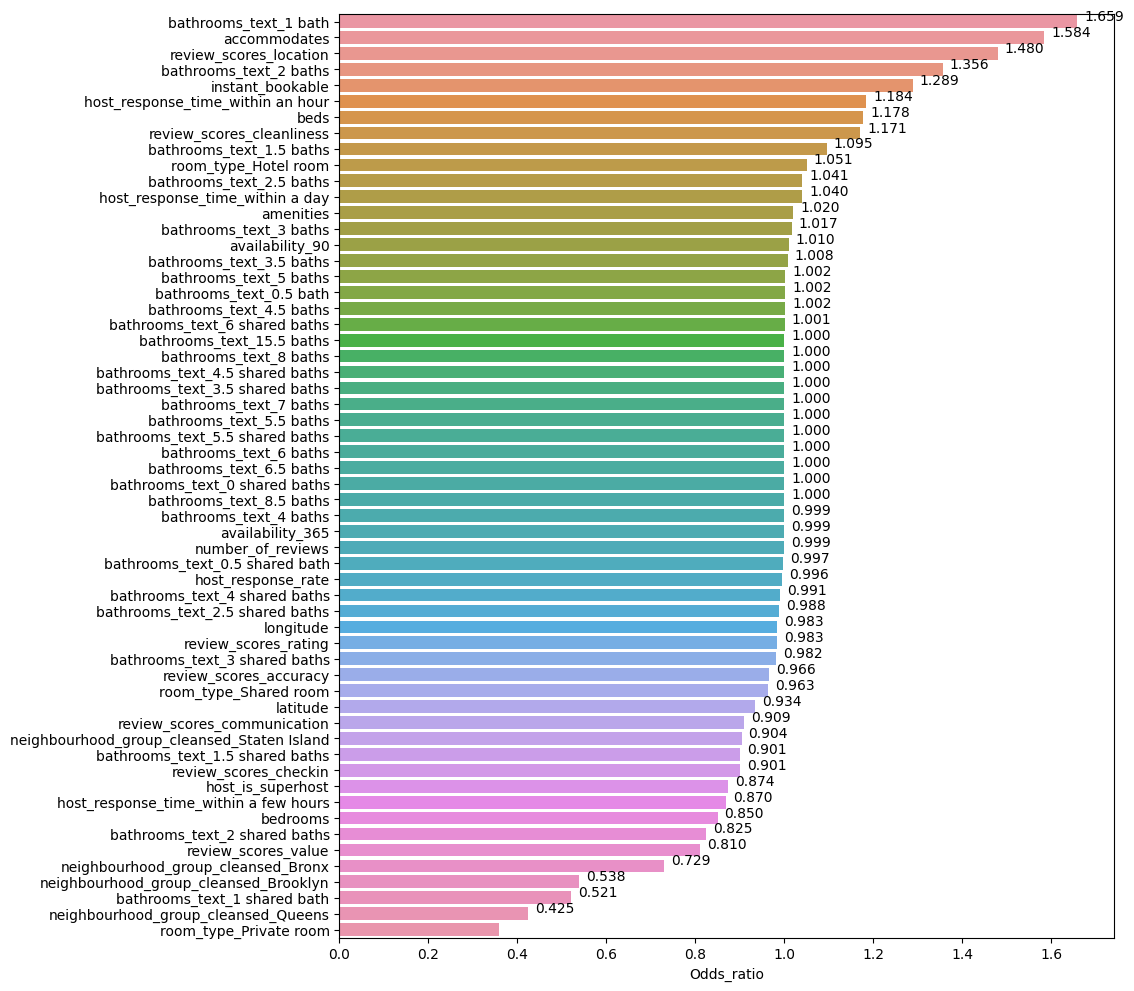

In [ ]:
# 데이터프레임 dft1의 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 12))

ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2), xytext=(5, 10), textcoords='offset points')

ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.show()

오즈비 해석

구간변수

수용인원이 1명 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 58.4% 증가한다.

위치에 대한 리뷰 점수가 1점 늘어날 경우 가격이 중위값보다 비쌀 확률은 48% 증가한다.

침대가 1개 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 17.8% 증가한다.

침실 수가 1개 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 15% 감소한다.

체크인 만족도 점수가 1점 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 9.9% 감소한다.

의사소통 점수가 1점 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 9.1% 감소한다.

범주형 변수

개인 화장실이 없는 경우와 비교하여 개인 화장실이 1개인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 1.66배 높다.

개인 화장실이 없는 경우와 비교하여 개인 화장실이 2개인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 1.63배 높다.

즉시 예약이 불가능한 경우와 비교하여 즉시 예약이 가능한 경우가 숙소 가격이 중위값보다 비쌀 가능성이 1.29배 높다.

숙소 지역이 Manhattan인 경우와 비교하여 숙소 지역이 Queens일 경우가 숙소 가격이 중위값보다 비쌀 가능성이 0.43배 낮다.

개인 화장실이 없는 경우와 비교하여 공용 화장실이 1개인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 0.52배 낮다.

숙소 지역이 Manhattan인 경우와 비교하여 숙소 지역이 Brooklyn일 경우가 숙소 가격이 중위값보다 비쌀 가능성이 0.54배 낮다.

표준화한 로지스틱 회귀 모델

In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다
numeric_cols = ['host_response_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df_num = df_logisticregerssion[numeric_cols]

# StandardScaler()로 데이터 스케일을 표준화하고, 결과를 데이터프레임으로 만든다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler()는 변수명을 지우므로 데이터프레임에 다시 변수명을 넣는다
df_num_standard.columns = df_num.columns
df_num_standard.head(3)

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,-0.465338,-0.789872,0.616723,-1.095997,0.166971,-0.683572,-0.211792,1.610783,1.512503,-0.364608,0.273118,-0.340707,0.790335,0.525045,0.503593,0.212445,0.849649
1,-0.465338,0.694422,-0.750657,-0.480465,-1.157718,-0.683572,-1.295293,-0.943466,-1.046394,-0.454091,-0.000247,-0.000096,-0.000432,-0.000009,0.000071,0.000177,-0.000095
2,-0.465338,0.247601,0.492647,-1.095997,0.166971,-0.683572,-0.976617,-0.943466,-1.046394,-0.454091,-0.000247,-0.000096,-0.000432,-0.000009,0.000071,0.000177,-0.000095


In [ ]:
# 원래 데이터프레임에서 구간 변수들을 제거하여 df_cat에 저장
df_cat = df_logisticregerssion.drop(numeric_cols, axis=1)

# 구간 변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)

# dfu의 변수명을 나열
dfu_standard.columns

Index(['host_response_rate', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price', 'host_is_superhost', 'instant_bookable',
       'price_B', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'bathrooms_text_0 shared baths', 'bathrooms_text_0.5 bath',
       'bathrooms_text_0.5 shared bath', 'bathrooms_text_1 bath',
       'bathroom

In [ ]:
# 표준화한 데이터세트로 로지스틱 회귀 재실행
data = dfu_standard.drop(['price', 'price_B'], axis=1)
target = dfu_standard['price_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (27125, 58)
x_test shape :  (11625, 58)


In [ ]:
# 로지스틱 회귀 기본 모델
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4, n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", grid_lr.best_params_)

best_clf = grid_lr.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.81648
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}
Accuracy on test set:0.81308


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.81308

bets parameter : {'penalty': 'none', 'solver': 'lbfgs'}

In [ ]:
dfu_standard.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/standard-scaled.csv', index=False)

사이킷런 신경망 분류 모델

In [ ]:
import pandas as pd
import numpy as np

df_neural_network_knn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/standard-scaled.csv')

data = df_neural_network_knn.drop(['price', 'price_B'], axis=1)
target = df_neural_network_knn['price_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (27125, 58)
x_test shape :  (11625, 58)


In [ ]:
# 신경망 기본 모델
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf_mlp = MLPClassifier(max_iter=2000, random_state=0)
clf_mlp.fit(x_train, y_train)

# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수의 예측값 생성
pred = clf_mlp.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print("Training set score:{:.5f}".format(clf_mlp.score(x_train, y_train)))
print("Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Training set score:0.88601
Test set score:0.83105


In [ ]:
# 신경망 기본 모델
clf_mlp = MLPClassifier(max_iter=500, random_state=4)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {
    'solver': ['sgd', 'lbfgs', 'adam'],
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
}

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
grid_mlp.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.84225
GridSearchCV best parameter: {'activation': 'logistic', 'alpha': 0.01, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.83613


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.83613

bets parameter : {'activation': 'logistic', 'alpha': 0.01, 'solver': 'adam'}

In [ ]:
# 신경망 기본 모델
clf_mlp = MLPClassifier(max_iter=500, random_state=4)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {
    'solver': ['adam'],
    'activation': ['logistic'],
    'alpha': [0.01],
}

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
grid_mlp.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.84225
GridSearchCV best parameter: {'activation': 'logistic', 'alpha': 0.01, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


최근접 이웃 분류 모델(KNN)

In [ ]:
import pandas as pd
import numpy as np

df_knn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/standard-scaled.csv')

data = df_knn.drop(['price', 'price_B'], axis=1)
target = df_knn['price_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (27125, 58)
x_test shape :  (11625, 58)


In [ ]:
# KNN 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타겟 변수 예측값을 생성
pred = clf_knn.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print("Training set score:{:.5f}".format(clf_knn.score(x_train, y_train)))
print("Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Training set score:0.89486
Test set score:0.81712


In [ ]:
# KNN 모델
clf_knn = KNeighborsClassifier(n_neighbors=3)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : range(3, 31)}

grid_knn = GridSearchCV(
    clf_knn, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_knn.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_knn.best_score_))
print("GridSearchCV best parameter:", (grid_knn.best_params_))

GridSearchCV max accuracy:0.82780
GridSearchCV best parameter: {'n_neighbors': 17}


In [ ]:
best_clf = grid_knn.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.83019


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.83019

bets parameter : {'n_neighbors': 17}

랜덤 포레스트

In [ ]:
import pandas as pd

# OrdinalEncoder를 import하여 범주형 데이터 변환
df_randomforest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/transformation_completed.csv')
from sklearn.preprocessing import OrdinalEncoder
df_randomforest['host_response_time_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['host_response_time'].values.reshape(-1,1))
df_randomforest['host_is_superhost_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['host_is_superhost'].values.reshape(-1,1))
df_randomforest['neighbourhood_group_cleansed_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['neighbourhood_group_cleansed'].values.reshape(-1,1))
df_randomforest['room_type_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['room_type'].values.reshape(-1,1))
df_randomforest['bathrooms_text_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['bathrooms_text'].values.reshape(-1,1))
df_randomforest['instant_bookable_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['instant_bookable'].values.reshape(-1,1))
df_randomforest.head(3)

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,room_type,bathrooms_text,instant_bookable,price_B,host_response_time_encoded,host_is_superhost_encoded,neighbourhood_group_cleansed_encoded,room_type_encoded,bathrooms_text_encoded,instant_bookable_encoded
0,92.557264,40.68457,-73.91181,1,1.591403,1.0,23,89,364,5,...,Private room,1 shared bath,f,0.0,0.0,0.0,1.0,2.0,5.0,0.0
1,92.557264,40.76878,-73.98719,2,1.000000,1.0,6,0,0,0,...,Private room,1 bath,f,0.0,0.0,0.0,2.0,2.0,4.0,0.0
2,92.557264,40.74343,-73.91865,1,1.591403,1.0,11,0,0,0,...,Entire home/apt,1 bath,f,0.0,0.0,0.0,3.0,0.0,4.0,0.0


In [ ]:
# 기존 범주형 변수 열 삭제
df_randomforest.drop(['host_response_time', 'host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'bathrooms_text', 'instant_bookable'], axis=1,inplace=True)
df_randomforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   host_response_rate                    38750 non-null  float64
 1   latitude                              38750 non-null  float64
 2   longitude                             38750 non-null  float64
 3   accommodates                          38750 non-null  int64  
 4   bedrooms                              38750 non-null  float64
 5   beds                                  38750 non-null  float64
 6   amenities                             38750 non-null  int64  
 7   availability_90                       38750 non-null  int64  
 8   availability_365                      38750 non-null  int64  
 9   number_of_reviews                     38750 non-null  int64  
 10  review_scores_rating                  38750 non-null  float64
 11  review_scores_a

In [ ]:
df_randomforest.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,review_scores_location,review_scores_value,price,price_B,host_response_time_encoded,host_is_superhost_encoded,neighbourhood_group_cleansed_encoded,room_type_encoded,bathrooms_text_encoded,instant_bookable_encoded
0,92.557264,40.68457,-73.91181,1,1.591403,1.0,23,89,364,5,...,4.80000,5.000000,65.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0
1,92.557264,40.76878,-73.98719,2,1.000000,1.0,6,0,0,0,...,4.72422,4.621431,110.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0
2,92.557264,40.74343,-73.91865,1,1.591403,1.0,11,0,0,0,...,4.72422,4.621431,99.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0
3,92.557264,40.68180,-73.93121,2,1.000000,1.0,14,0,0,2,...,5.00000,5.000000,70.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
4,92.557264,40.68209,-73.94279,4,1.000000,2.0,43,35,96,88,...,4.94000,4.920000,170.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0


In [ ]:
df_randomforest.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/encoded.csv', index = False)

In [ ]:
# 범주형 변수를 cols에 저장.
cols = ['host_response_time_encoded', 'host_is_superhost_encoded', 'neighbourhood_group_cleansed_encoded', 'room_type_encoded', 'bathrooms_text_encoded', 'instant_bookable_encoded', 'price_B']

# 범주형 변수의 dtype을 category로 변경
df_randomforest[cols] = df_randomforest[cols].astype('category')
df_randomforest.dtypes

host_response_rate                       float64
latitude                                 float64
longitude                                float64
accommodates                               int64
bedrooms                                 float64
beds                                     float64
amenities                                  int64
availability_90                            int64
availability_365                           int64
number_of_reviews                          int64
review_scores_rating                     float64
review_scores_accuracy                   float64
review_scores_cleanliness                float64
review_scores_checkin                    float64
review_scores_communication              float64
review_scores_location                   float64
review_scores_value                      float64
price                                    float64
price_B                                 category
host_response_time_encoded              category
host_is_superhost_en

In [ ]:
data = df_randomforest.drop(['price', 'price_B'], axis=1)
target = df_randomforest['price_B']
print("data_shape : ", data.shape)
print("target_shape : ", target.shape)

data_shape :  (38750, 23)
target_shape :  (38750,)


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)

In [ ]:
# 랜덤 포레스트 모델(기본 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=4)
model = rf.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = rf.predict(x_test)

print("Accuracy on training set:{:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set:0.99985
Accuracy on test set:0.84826


과적합이 발생했으므로 과적합 해소, 교차 검증, 모델 최적화를 위해 학습하지 않은 기본 모델을 다시 생성한 후 그리드 서치 실행

In [ ]:
# 랜덤 포레스트 모델(기본 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators=100, random_state=4)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션 값을 4로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
params = {"max_depth" : range(10, 41), 'n_estimators' : [100,200]}

#GridSearchCV의 cv=cross_validation 옵션값은 StratifiedKFold의 random_state 옵션값을 적용해서 GridSearchCV를 실행할 때마다 항상 동일한 결과가 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation, verbose=1, n_jobs=-1)
grid_rf.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.85382
GridSearchCV best parameter: {'max_depth': 24, 'n_estimators': 200}


In [ ]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(x_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))


Accuracy on test set:0.85006
ROC AUC on test set:0.92615


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.85006

ROC AUC값 : 0.92615

bets parameter : {'max_depth': 24, 'n_estimators': 200}

In [ ]:
print ("Feature importances:")
print (best_clf.feature_importances_)

Feature importances:
[0.01758667 0.09107983 0.12699807 0.09748449 0.05977246 0.04918135
 0.06440887 0.03559836 0.03700048 0.03075192 0.02347329 0.0218179
 0.02673539 0.01885674 0.01803783 0.02831958 0.02504138 0.01639593
 0.00484147 0.02698775 0.12363632 0.04668772 0.00930623]


In [ ]:
import numpy as np

# 변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3),index=feature_names, columns=['Feature_importances'])

# Feature_importances의 값을 내림차순으로 정리
dft1 = dft.sort_values(by="Feature_importances", ascending=False)
dft1

,Feature_importances
longitude,0.127
room_type_encoded,0.124
accommodates,0.097
latitude,0.091
amenities,0.064
bedrooms,0.060
beds,0.049
bathrooms_text_encoded,0.047
availability_365,0.037
availability_90,0.036


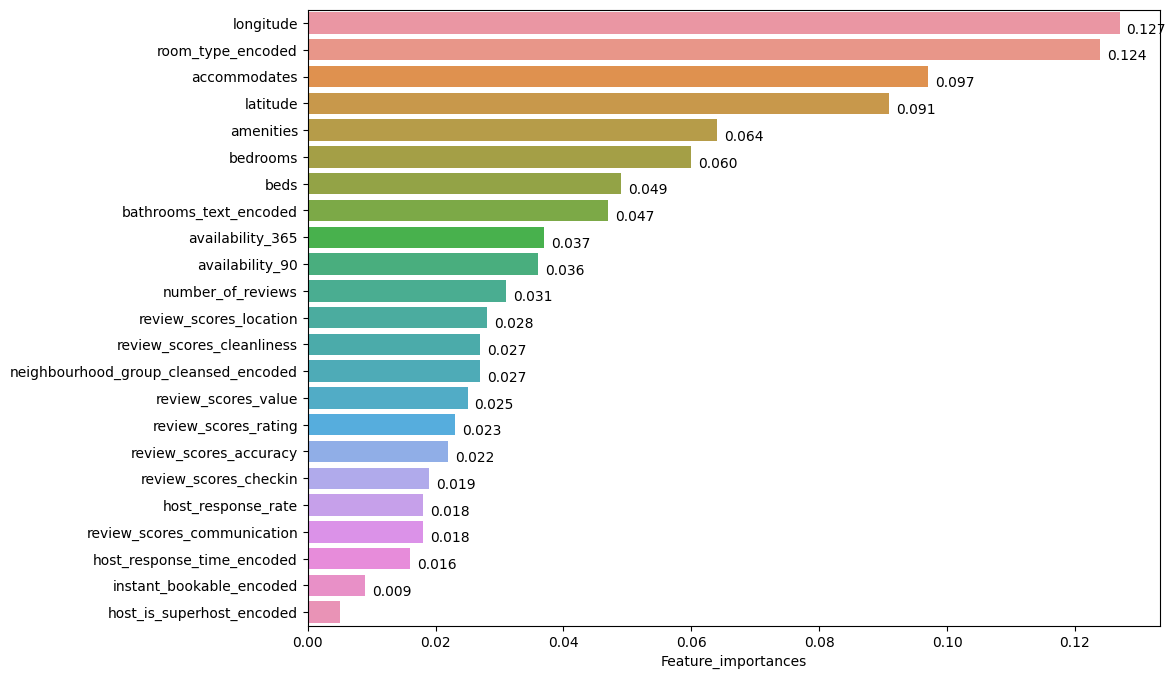

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11,8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.3), xytext=(5,10), textcoords='offset points')

그레디언트 부스팅 모델

In [ ]:
import pandas as pd

df_gradientboosting = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/encoded.csv')

In [ ]:
# 범주형 변수를 cols에 저장.
cols = ['host_response_time_encoded', 'host_is_superhost_encoded', 'neighbourhood_group_cleansed_encoded', 'room_type_encoded', 'bathrooms_text_encoded', 'instant_bookable_encoded', 'price_B']

# 범주형 변수의 dtype을 category로 변경
df_gradientboosting[cols] = df_gradientboosting[cols].astype('category')
df_gradientboosting.dtypes

host_response_rate                       float64
latitude                                 float64
longitude                                float64
accommodates                               int64
bedrooms                                 float64
beds                                     float64
amenities                                  int64
availability_90                            int64
availability_365                           int64
number_of_reviews                          int64
review_scores_rating                     float64
review_scores_accuracy                   float64
review_scores_cleanliness                float64
review_scores_checkin                    float64
review_scores_communication              float64
review_scores_location                   float64
review_scores_value                      float64
price                                    float64
price_B                                 category
host_response_time_encoded              category
host_is_superhost_en

In [ ]:
data = df_gradientboosting.drop(['price', 'price_B'], axis=1)
target = df_gradientboosting['price_B']
print("data_shape : ", data.shape)
print("target_shape : ", target.shape)

data_shape :  (38750, 23)
target_shape :  (38750,)


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)

In [ ]:
# 그레디언트 부스팅 모델 (기본 모델)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gr = GradientBoostingClassifier(random_state=4)
model = gr.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print("Accuracy on training set:{:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set:0.84767
Accuracy on test set:0.83828


In [ ]:
gr = GradientBoostingClassifier(random_state=4)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 4로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
params = {'max_depth':range(11,16), 'n_estimators':[100,200], 'learning_rate':[0.01, 0.1]}

# GridSearchCV의 cv=cross_validation 옵션값은 StratifiedKFold의 random_state 옵션값을 적용해 GridSearchCV를 실행할 때마다 항상 동일한 결과가 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation, n_jobs=-1)
grid_gr.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))

GridSearchCV max accuracy:0.84933
GridSearchCV best parameter: {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 200}


In [ ]:
best_clf = grid_gr.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(x_test)[:,1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.84723
ROC AUC on test set:0.92579


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.84723

ROC AUC값 : 0.92579

bets parameter : {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 200}

In [ ]:
# 데이터프레임의 행과 열 전체를 보이게 하는 조치를 (필요시) 추가
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

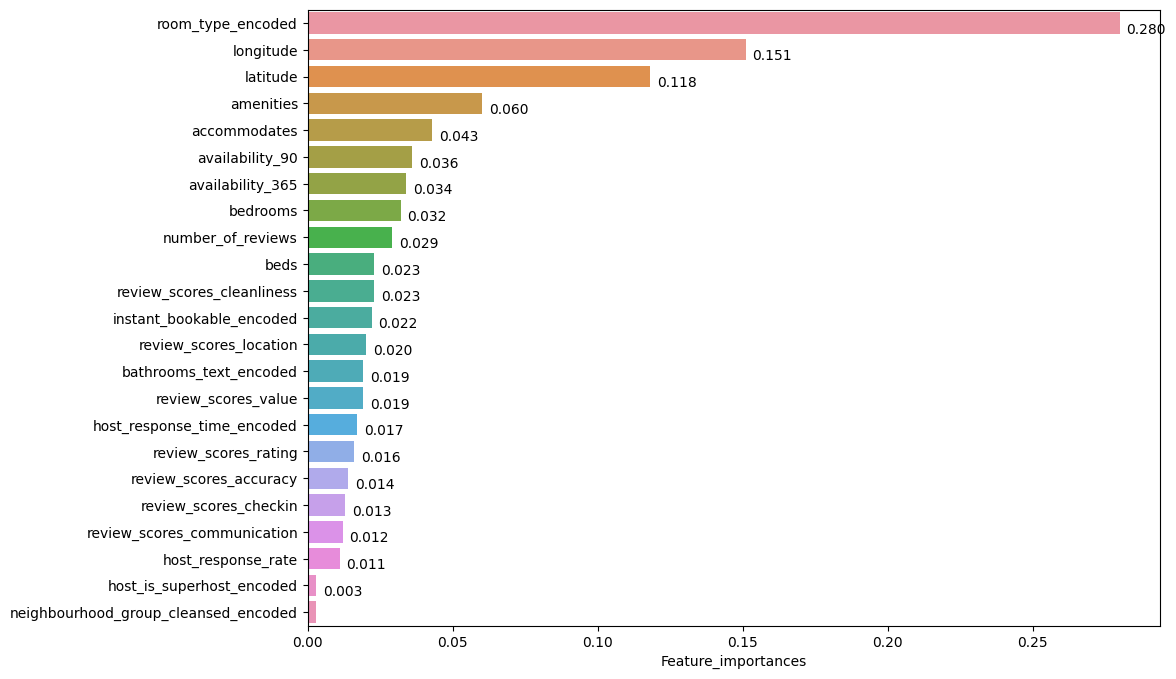

In [ ]:
import numpy as np

# 변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.feature_importances_,3), index=feature_names, columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)

# 데이터프레임 dft1의 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11,8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.3), xytext=(5,10), textcoords='offset points')

라쏘 (로지스틱 회귀) 모델

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/encoded.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   host_response_rate                    38750 non-null  float64
 1   latitude                              38750 non-null  float64
 2   longitude                             38750 non-null  float64
 3   accommodates                          38750 non-null  int64  
 4   bedrooms                              38750 non-null  float64
 5   beds                                  38750 non-null  float64
 6   amenities                             38750 non-null  int64  
 7   availability_90                       38750 non-null  int64  
 8   availability_365                      38750 non-null  int64  
 9   number_of_reviews                     38750 non-null  int64  
 10  review_scores_rating                  38750 non-null  float64
 11  review_scores_a

In [ ]:
cols=['host_response_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price', 'price_B']
df_cat = df.drop(cols, axis=1)  # 데이터프레임에서 구간 변수 및 2개의 타겟변수 제외
df_cat.shape

(38750, 6)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df_cat.describe()

,host_response_time_encoded,host_is_superhost_encoded,neighbourhood_group_cleansed_encoded,room_type_encoded,bathrooms_text_encoded,instant_bookable_encoded
count,38750.00,38750.00,38750.00,38750.00,38750.00,38750.00
mean,1.61,0.21,1.74,0.91,5.12,0.20
std,1.35,0.40,0.79,1.01,2.32,0.40
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,0.00,4.00,0.00
50%,2.00,0.00,2.00,0.00,4.00,0.00
75%,3.00,0.00,2.00,2.00,5.00,0.00
max,3.00,1.00,4.00,3.00,29.00,1.00


In [ ]:
df_cat.max() - df_cat.min()

host_response_time_encoded              3.00
host_is_superhost_encoded               1.00
neighbourhood_group_cleansed_encoded    4.00
room_type_encoded                       3.00
bathrooms_text_encoded                 29.00
instant_bookable_encoded                1.00
dtype: float64

In [ ]:
df_cat.min()

host_response_time_encoded             0.00
host_is_superhost_encoded              0.00
neighbourhood_group_cleansed_encoded   0.00
room_type_encoded                      0.00
bathrooms_text_encoded                 0.00
instant_bookable_encoded               0.00
dtype: float64

In [ ]:
# 6개 범주형 변수중에서 값으로 0과 1만 가지는 (이미 더미 변수화 되어 있는) 2개 변수명을 제외하고서 cols1에 저장
cols1 = ['host_response_time_encoded', 'neighbourhood_group_cleansed_encoded', 'room_type_encoded','bathrooms_text_encoded']
df_lasso = pd.get_dummies(df, columns=cols1)  # cols1에 담긴 변수들의 더미변수를 생성
                                          # 이 명령은 더미변수를 생성한 원본변수는 제거함

In [ ]:
df_lasso.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,bathrooms_text_encoded_20.0,bathrooms_text_encoded_21.0,bathrooms_text_encoded_22.0,bathrooms_text_encoded_23.0,bathrooms_text_encoded_24.0,bathrooms_text_encoded_25.0,bathrooms_text_encoded_26.0,bathrooms_text_encoded_27.0,bathrooms_text_encoded_28.0,bathrooms_text_encoded_29.0
0,92.56,40.68,-73.91,1,1.59,1.00,23,89,364,5,...,0,0,0,0,0,0,0,0,0,0
1,92.56,40.77,-73.99,2,1.00,1.00,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92.56,40.74,-73.92,1,1.59,1.00,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92.56,40.68,-73.93,2,1.00,1.00,14,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,92.56,40.68,-73.94,4,1.00,2.00,43,35,96,88,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_lasso.shape

(38750, 64)

In [ ]:
list(df_lasso.columns)

['host_response_rate',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'amenities',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'price',
 'price_B',
 'host_is_superhost_encoded',
 'instant_bookable_encoded',
 'host_response_time_encoded_0.0',
 'host_response_time_encoded_1.0',
 'host_response_time_encoded_2.0',
 'host_response_time_encoded_3.0',
 'neighbourhood_group_cleansed_encoded_0.0',
 'neighbourhood_group_cleansed_encoded_1.0',
 'neighbourhood_group_cleansed_encoded_2.0',
 'neighbourhood_group_cleansed_encoded_3.0',
 'neighbourhood_group_cleansed_encoded_4.0',
 'room_type_encoded_0.0',
 'room_type_encoded_1.0',
 'room_type_encoded_2.0',
 'room_type_encoded_3.0',
 'bathrooms_text_encoded_0.0',
 'bathrooms_text_encoded_1.0',
 'bathrooms_text_encoded_2.0',


In [ ]:
# 기준 더미변수로 정한 4개의 더미변수명을 cols2에 저장
cols2 = ['host_response_time_encoded_0.0', 'neighbourhood_group_cleansed_encoded_2.0', 'room_type_encoded_0.0', 'bathrooms_text_encoded_0.0']
df_lasso.drop(cols2, axis=1, inplace=True)    # cols2에 저장된 더미 변수명을 데이터프레임에서 제거
df_lasso.shape

(38750, 60)

In [ ]:
data = df_lasso.drop(['price', 'price_B'], axis=1)
target = df_lasso['price_B']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (27125, 58)
x_test shape: (11625, 58)


In [ ]:
# 라쏘 모델(liblinear를 사용한 기본 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty="l1", solver='liblinear', C=1, random_state=4)
model = ls.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = model.predict(x_test)

print("Accuracy on training set:{:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set:0.81331
Accuracy on test set:0.80826


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# 라쏘 모델(liblinear를 사용한 기본 모델)
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'liblinear', 'sag', 'saga'],
          'C':[0.01,0.05,0.1,0.2,0.3,0.5,1]
         }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행할 때마다 결과가 항상 동일하게 나오도록 보장
grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1, verbose=1)
grid_ls.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV max accuracy:0.81290
GridSearchCV best parameter: {'C': 1, 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(x_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.80817
ROC AUC on test set:0.88493


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.80817

ROC AUC값 : 0.88493

bets parameter : {'C': 1, 'solver': 'liblinear'}

In [ ]:
import numpy as np
print("Number of features used:", np.sum(best_clf.coef_ != 0))

Number of features used: 43


In [ ]:
print('회귀계수', best_clf.coef_)

회귀계수 [[ 1.25571520e-02 -2.56369423e-01 -7.74454697e-02  4.27423308e-01
  -6.34017200e-02  2.38112500e-01  2.26934349e-02  1.18447959e-02
  -1.81987298e-04 -1.21808249e-03  7.59364826e-02  1.01729792e-02
   6.31984577e-01 -2.47151308e-01 -1.42931598e-01  9.31170622e-01
  -6.79310108e-01 -7.79052436e-02  1.97290221e-01 -1.55709259e-01
  -3.08968182e-01  9.54770768e-02 -2.26446704e+00 -1.16821230e+00
  -2.06731746e+00 -3.05735259e+00  3.54514975e+00 -1.17841871e+00
  -4.18809617e-01 -5.59517575e-01  3.07277677e-01 -5.29309604e-01
   0.00000000e+00 -1.09957341e+00  2.68845110e-01 -1.18116340e+00
   0.00000000e+00  7.30741861e-01 -1.87450056e+00  1.04041549e+00
  -1.19655271e+00  0.00000000e+00 -2.06658875e+00  1.56854237e+00
   0.00000000e+00 -5.37633929e-01 -2.69948498e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
feature_names = list(data.columns)
# 변수 index에 coefficient값을 매칭해 데이터프레임으로 저장
dft = pd.DataFrame(best_clf.coef_.transpose(), index=feature_names, columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=False)
dft1

,coef
room_type_encoded_1.0,3.55
bathrooms_text_encoded_15.0,1.57
bathrooms_text_encoded_11.0,1.04
review_scores_location,0.93
bathrooms_text_encoded_9.0,0.73
review_scores_cleanliness,0.63
accommodates,0.43
bathrooms_text_encoded_2.0,0.31
bathrooms_text_encoded_6.0,0.27
beds,0.24


In [ ]:
# 오즈비 계산
feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.exp(best_clf.coef_).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
room_type_encoded_1.0,34.64
bathrooms_text_encoded_15.0,4.80
bathrooms_text_encoded_11.0,2.83
review_scores_location,2.54
bathrooms_text_encoded_9.0,2.08
review_scores_cleanliness,1.88
accommodates,1.53
bathrooms_text_encoded_2.0,1.36
bathrooms_text_encoded_6.0,1.31
beds,1.27


In [ ]:
# 오즈비가 1(계숫값이 0)인 변수를 제거
dft2 = dft1[dft1['Odds_ratio'] != 1]
dft2.shape

(43, 1)

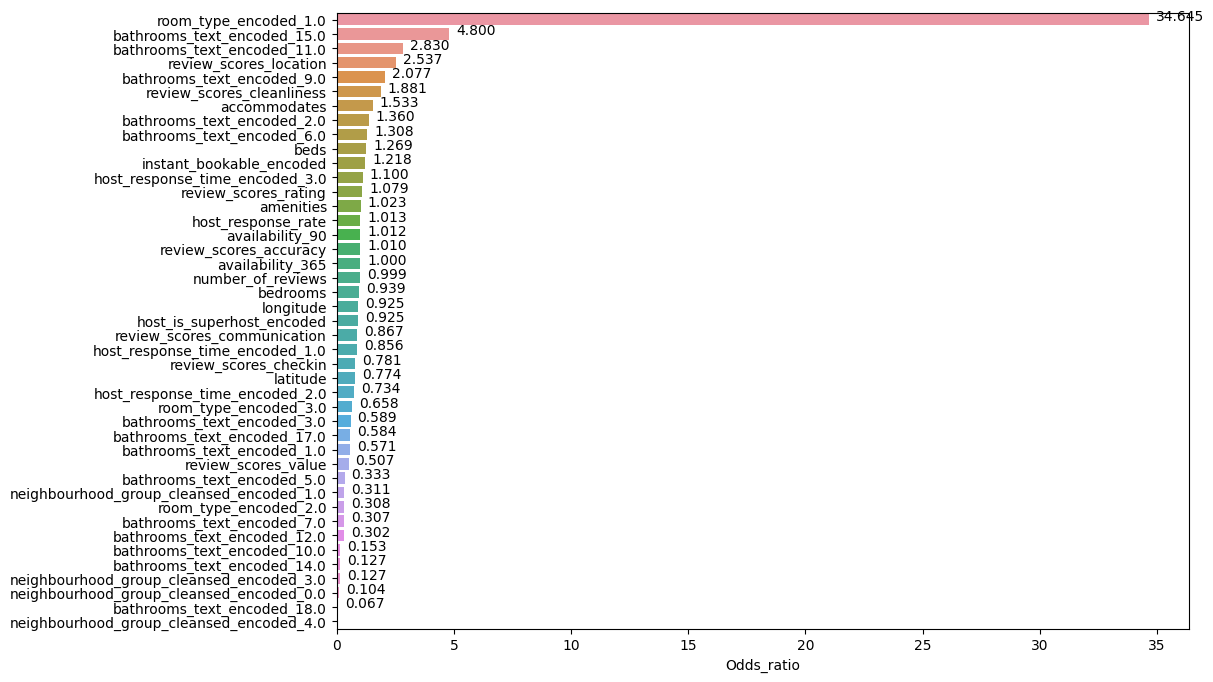

In [ ]:
# 데이터프레임 dft2의 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax= plt.subplots(figsize=(11,8))
ax = sns.barplot(y=dft2.index, x="Odds_ratio", data=dft2)

for p in ax.patches:
  ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.4),
                xytext=(5, 10), textcoords='offset points')

오즈비 해석

구간변수

위치에 대한 리뷰 점수가 1점 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 2.54배 증가한다.

청결도에 대한 리뷰 점수가 1점 늘어날 경우 가격이 중위값보다 비쌀 확률은 88.1% 증가한다.

수용 인원이 1명 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 53.3% 증가한다.

체크인 만족도 점수가 1점 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 21.9% 감소한다.

의사소통 만족도 점수가 1점 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 13.3% 감소한다.

경도가 1도 늘어날 경우 숙소 가격이 중위값보다 비쌀 확률은 7.5% 감소한다.

범주형 변수

방의 종류가 아파트인 경우와 비교하여 방의 종류가 호텔인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 34.64배 높다.

개인 화장실이 없는 경우와 비교하여 개인 화장실이 3.5개인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 4.80배 높다.

개인 화장실이 없는 경우와 비교하여 개인 화장실이 2.5개인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 2.83배 높다.

숙소 지역이 Manhattan인 경우와 비교하여 숙소 지역이 Staten Island일 경우가 숙소 가격이 중위값보다 비쌀 가능성이 0.05배 낮다.

개인 화장실이 없는 경우와 비교하여 공용 화장실이 4개인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 0.07배 낮다.

숙소 지역이 Manhattan인 경우와 비교하여 숙소 지역이 Bronx인 경우가 숙소 가격이 중위값보다 비쌀 가능성이 0.10배 낮다.

신경망 모델

In [ ]:
import pandas as pd

df_tf_keras = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/standard-scaled.csv')
df_tf_keras.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,bathrooms_text_4.5 shared baths,bathrooms_text_5 baths,bathrooms_text_5.5 baths,bathrooms_text_5.5 shared baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_6.5 baths,bathrooms_text_7 baths,bathrooms_text_8 baths,bathrooms_text_8.5 baths
0,-0.465338,-0.789872,0.616723,-1.095997,0.166971,-0.683572,-0.211792,1.610783,1.512503,-0.364608,...,0,0,0,0,0,0,0,0,0,0
1,-0.465338,0.694422,-0.750657,-0.480465,-1.157718,-0.683572,-1.295293,-0.943466,-1.046394,-0.454091,...,0,0,0,0,0,0,0,0,0,0
2,-0.465338,0.247601,0.492647,-1.095997,0.166971,-0.683572,-0.976617,-0.943466,-1.046394,-0.454091,...,0,0,0,0,0,0,0,0,0,0
3,-0.465338,-0.838696,0.264810,-0.480465,-1.157718,-0.683572,-0.785410,-0.943466,-1.046394,-0.418298,...,0,0,0,0,0,0,0,0,0,0
4,-0.465338,-0.833584,0.054751,0.750600,-1.157718,0.548628,1.062915,0.061014,-0.371520,1.120804,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tf_keras.shape

(38750, 60)

In [ ]:
data = df_tf_keras.drop(['price', 'price_B'], axis=1)
target = df_tf_keras['price_B']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (27125, 58)
x_test shape: (11625, 58)


In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
print(x_train_np)

[[-0.93751976 -0.84504124  0.44693435 ...  0.          0.
   0.        ]
 [ 0.90891163 -1.48909894  1.01307849 ...  0.          0.
   0.        ]
 [ 0.90891163  1.00305535 -0.45352687 ...  0.          0.
   0.        ]
 ...
 [-0.93751976  0.36763444 -0.71601023 ...  0.          0.
   0.        ]
 [ 0.90891163 -0.63374216 -0.37000487 ...  0.          0.
   0.        ]
 [-0.38359034 -1.34334459 -0.11308817 ...  0.          0.
   0.        ]]


In [ ]:
x_train_np.shape

(27125, 58)

In [ ]:
print(y_train_np)

[1. 0. 0. ... 1. 1. 0.]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# 활성화 함수 relu, 옵티마이저 adam
import random as python_random
import numpy as np

np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

In [ ]:
# 활성화 함수 relu
model = tf.keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[58]),
    layers.Dropout(.5),
    layers.Dense(100, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# 옵티마이저 adam
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [ ]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('Ch8-NN1.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',
                                                  restore_best_weights=True)

history = model.fit(x_train_np, y_train_np,
                    validation_split=0.25,
                    shuffle=True,
                    epochs=30,
                    callbacks = [checkpointer, early_stopping_cb]
                    )

Epoch 1/30


636/636 [==============================] - 26s 36ms/step - loss: 0.4702 - accuracy: 0.7834 - val_loss: 0.3916 - val_accuracy: 0.8278
Epoch 2/30
636/636 [==============================] - 24s 39ms/step - loss: 0.4211 - accuracy: 0.8181 - val_loss: 0.3817 - val_accuracy: 0.8316
Epoch 3/30
636/636 [==============================] - 22s 35ms/step - loss: 0.4059 - accuracy: 0.8210 - val_loss: 0.3771 - val_accuracy: 0.8329
Epoch 4/30
636/636 [==============================] - 23s 37ms/step - loss: 0.4001 - accuracy: 0.8272 - val_loss: 0.3709 - val_accuracy: 0.8378
Epoch 5/30
636/636 [==============================] - 23s 35ms/step - loss: 0.3902 - accuracy: 0.8321 - val_loss: 0.3687 - val_accuracy: 0.8378
Epoch 6/30
636/636 [==============================] - 23s 36ms/step - loss: 0.3878 - accuracy: 0.8331 - val_loss: 0.3661 - val_accuracy: 0.8394
Epoch 7/30
636/636 [==============================] - 21s 34ms/step - loss: 0.3844 - accuracy: 0.8321 - val_loss: 0.3716 - val_accuracy: 0.8387
Epo

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               5900      
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 16101 (62.89 KB)
Trainable params: 16101 (62.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


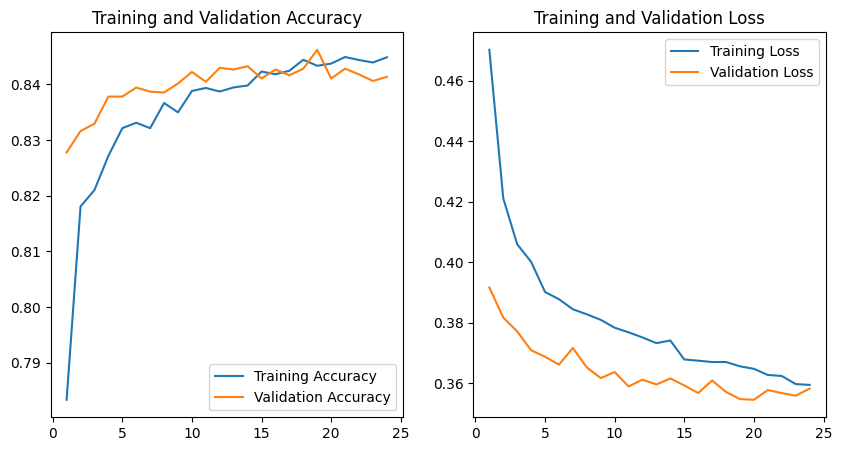

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']         # 모델의 학습 정확도를 변수 acc에 저장
val_acc = history.history['val_accuracy'] # 모델의 검증 정확도를 변수 val_acc에 저장
loss=history.history['loss']              # 모델의 학습 손실을 변수 loss에 저장
val_loss=history.history['val_loss']      # 모델의 검증 손실을 변수 val_loss에 저장



epochs_range = range(1, 24+1)

# 학습 정확도와 검증 정확도 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 학습 손실와 검증 손실 그리기
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# model.fit() 실행시 검증 정확도가 가장 높은 에포크에 해당하는 모델 가중치 계수 불러오기
model.load_weights('/content/Ch8-NN1.tf')

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test accuracy:", test_accuracy)

364/364 [==============================] - 6s 18ms/step - loss: 0.3672 - accuracy: 0.8362
test accuracy: 0.836215078830719


In [ ]:
y_prob = model.predict(x_test)
y_prob.round(2)

364/364 [==============================] - 3s 8ms/step


array([[0.01],
       [0.01],
       [0.95],
       ...,
       [0.98],
       [0.4 ],
       [0.02]], dtype=float32)

In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict(x_test)
ROC_AUC = roc_auc_score(y_test, y_prob)
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

364/364 [==============================] - 2s 7ms/step
ROC AUC on test set:0.91674


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.83622

ROC AUC값 : 0.91674

서포트 백터 머신

In [ ]:
import pandas as pd

df_svm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/standard-scaled.csv')
df_svm.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,bathrooms_text_4.5 shared baths,bathrooms_text_5 baths,bathrooms_text_5.5 baths,bathrooms_text_5.5 shared baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_6.5 baths,bathrooms_text_7 baths,bathrooms_text_8 baths,bathrooms_text_8.5 baths
0,-0.465338,-0.789872,0.616723,-1.095997,0.166971,-0.683572,-0.211792,1.610783,1.512503,-0.364608,...,0,0,0,0,0,0,0,0,0,0
1,-0.465338,0.694422,-0.750657,-0.480465,-1.157718,-0.683572,-1.295293,-0.943466,-1.046394,-0.454091,...,0,0,0,0,0,0,0,0,0,0
2,-0.465338,0.247601,0.492647,-1.095997,0.166971,-0.683572,-0.976617,-0.943466,-1.046394,-0.454091,...,0,0,0,0,0,0,0,0,0,0
3,-0.465338,-0.838696,0.264810,-0.480465,-1.157718,-0.683572,-0.785410,-0.943466,-1.046394,-0.418298,...,0,0,0,0,0,0,0,0,0,0
4,-0.465338,-0.833584,0.054751,0.750600,-1.157718,0.548628,1.062915,0.061014,-0.371520,1.120804,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = df_svm.drop(['price', 'price_B'], axis=1)  # 타겟변수를 제외한 입력변수를 data에 저장
target = df_svm['price_B']                # 타겟변수만 target 데이터프레임에 저장

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (27125, 58)
x_test shape: (11625, 58)


In [ ]:
# SVM 모델(default 모델)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', C=1, gamma = 'auto', random_state=4, probability=True)

model = svm.fit(x_train, y_train)
pred = model.predict(x_test)    # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print("SVM Accuracy on training set:{:.5f}".format(model.score(x_train, y_train)))
print("SVM Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

SVM Accuracy on training set:0.84280
SVM Accuracy on test set:0.83277


In [ ]:
# SVM 모델(default 모델)
svm = SVC(kernel='rbf', C=1, gamma='auto', random_state=4, probability=True)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
params = {'kernel':['sigmoid'], 'C':[0.0001, 0.01, 1, 10], 'gamma':['auto', 'scale']}

grid_svm = GridSearchCV(svm, param_grid=params, scoring='accuracy', cv=cross_validation, n_jobs=-1)
grid_svm.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_svm.best_score_))
print("GridSearchCV best parameter:", (grid_svm.best_params_))

GridSearchCV max accuracy:0.80369
GridSearchCV best parameter: {'C': 0.01, 'gamma': 'auto', 'kernel': 'sigmoid'}


In [ ]:
# SVM 모델(default 모델)
svm = SVC(kernel='rbf', C=1, gamma='auto', random_state=4, probability=True)

# 그리드 서치 재실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
params = {'kernel':['rbf'], 'C':[0.0001, 0.01, 1, 10], 'gamma':['auto', 'scale']}

grid_svm = GridSearchCV(svm, param_grid=params, scoring='accuracy', cv=cross_validation, n_jobs=-1)
grid_svm.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_svm.best_score_))
print("GridSearchCV best parameter:", (grid_svm.best_params_))

GridSearchCV max accuracy:0.84000
GridSearchCV best parameter: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
best_clf = grid_svm.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(x_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test:0.83690
ROC AUC on test set:0.91320


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.83690

ROC AUC값 : 0.91320

bets parameter : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

회귀, 릿지 모델

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/encoded.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   host_response_rate                    38750 non-null  float64
 1   latitude                              38750 non-null  float64
 2   longitude                             38750 non-null  float64
 3   accommodates                          38750 non-null  int64  
 4   bedrooms                              38750 non-null  float64
 5   beds                                  38750 non-null  float64
 6   amenities                             38750 non-null  int64  
 7   availability_90                       38750 non-null  int64  
 8   availability_365                      38750 non-null  int64  
 9   number_of_reviews                     38750 non-null  int64  
 10  review_scores_rating                  38750 non-null  float64
 11  review_scores_a

In [ ]:
cols=['host_response_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price', 'price_B']
df_cat = df.drop(cols, axis=1)  # 데이터프레임에서 구간 변수 및 2개의 타겟변수 제외
df_cat.shape

(38750, 6)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df_cat.describe()

,host_response_time_encoded,host_is_superhost_encoded,neighbourhood_group_cleansed_encoded,room_type_encoded,bathrooms_text_encoded,instant_bookable_encoded
count,38750.00,38750.00,38750.00,38750.00,38750.00,38750.00
mean,1.61,0.21,1.74,0.91,5.12,0.20
std,1.35,0.40,0.79,1.01,2.32,0.40
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,0.00,4.00,0.00
50%,2.00,0.00,2.00,0.00,4.00,0.00
75%,3.00,0.00,2.00,2.00,5.00,0.00
max,3.00,1.00,4.00,3.00,29.00,1.00


In [ ]:
df_cat.max() - df_cat.min()

host_response_time_encoded              3.00
host_is_superhost_encoded               1.00
neighbourhood_group_cleansed_encoded    4.00
room_type_encoded                       3.00
bathrooms_text_encoded                 29.00
instant_bookable_encoded                1.00
dtype: float64

In [ ]:
df_cat.min()

host_response_time_encoded             0.00
host_is_superhost_encoded              0.00
neighbourhood_group_cleansed_encoded   0.00
room_type_encoded                      0.00
bathrooms_text_encoded                 0.00
instant_bookable_encoded               0.00
dtype: float64

In [ ]:
# 6개 범주형 변수중에서 값으로 0과 1만 가지는 (이미 더미 변수화 되어 있는) 2개 변수명을 제외하고서 cols1에 저장
cols1 = ['host_response_time_encoded', 'neighbourhood_group_cleansed_encoded', 'room_type_encoded','bathrooms_text_encoded']
df_ridge = pd.get_dummies(df, columns=cols1)  # cols1에 담긴 변수들의 더미변수를 생성
                                          # 이 명령은 더미변수를 생성한 원본변수는 제거함


In [ ]:
df_ridge.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,bathrooms_text_encoded_20.0,bathrooms_text_encoded_21.0,bathrooms_text_encoded_22.0,bathrooms_text_encoded_23.0,bathrooms_text_encoded_24.0,bathrooms_text_encoded_25.0,bathrooms_text_encoded_26.0,bathrooms_text_encoded_27.0,bathrooms_text_encoded_28.0,bathrooms_text_encoded_29.0
0,92.56,40.68,-73.91,1,1.59,1.00,23,89,364,5,...,0,0,0,0,0,0,0,0,0,0
1,92.56,40.77,-73.99,2,1.00,1.00,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92.56,40.74,-73.92,1,1.59,1.00,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92.56,40.68,-73.93,2,1.00,1.00,14,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,92.56,40.68,-73.94,4,1.00,2.00,43,35,96,88,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ridge.shape

(38750, 64)

In [ ]:
list(df_ridge.columns)

['host_response_rate',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'amenities',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'price',
 'price_B',
 'host_is_superhost_encoded',
 'instant_bookable_encoded',
 'host_response_time_encoded_0.0',
 'host_response_time_encoded_1.0',
 'host_response_time_encoded_2.0',
 'host_response_time_encoded_3.0',
 'neighbourhood_group_cleansed_encoded_0.0',
 'neighbourhood_group_cleansed_encoded_1.0',
 'neighbourhood_group_cleansed_encoded_2.0',
 'neighbourhood_group_cleansed_encoded_3.0',
 'neighbourhood_group_cleansed_encoded_4.0',
 'room_type_encoded_0.0',
 'room_type_encoded_1.0',
 'room_type_encoded_2.0',
 'room_type_encoded_3.0',
 'bathrooms_text_encoded_0.0',
 'bathrooms_text_encoded_1.0',
 'bathrooms_text_encoded_2.0',


In [ ]:
# 기준 더미변수로 정한 4개의 더미변수명을 cols2에 저장
cols2 = ['host_response_time_encoded_0.0', 'neighbourhood_group_cleansed_encoded_2.0', 'room_type_encoded_0.0', 'bathrooms_text_encoded_0.0']
df_ridge.drop(cols2, axis=1, inplace=True)    # cols2에 저장된 더미 변수명을 데이터프레임에서 제거
df_ridge.shape

(38750, 60)

In [ ]:
data = df_ridge.drop(['price', 'price_B'], axis=1)    # 타겟변수를 제외한 입력변수를 data에 저장
target = df['price']                # 타겟변수만 target에 저장

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (27125, 58)
x_test shape: (11625, 58)


In [ ]:
# 선형 회귀 모델(기본 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(x_train, y_train)
pred = model.predict(x_test)

print("Linear Regression Training set score:{:.5f}".format(model.score(x_train, y_train)))
print("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.15757
Linear Regression Test set r2 score:0.12272


<Axes: xlabel='y_test', ylabel='pred'>

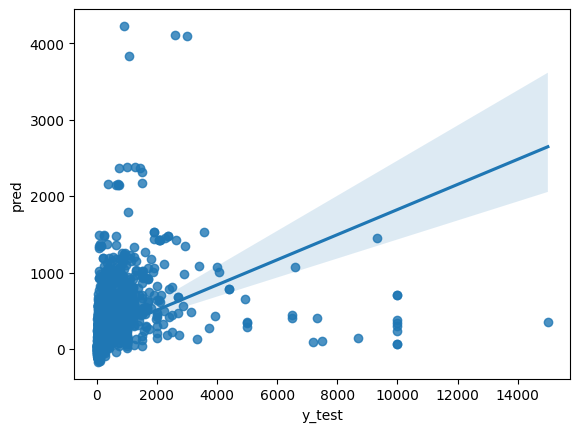

In [ ]:
import seaborn as sns

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(pred)], axis = 1)
final_result.columns = ['y_test', 'pred']
sns.regplot(x='y_test', y='pred', data=final_result)

In [ ]:
# 릿지 모델(기본 모델)
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

Ridge = Ridge()
model = Ridge.fit(x_train, y_train)
pred = model.predict(x_test)

print("Linear Regression Training set score:{:.5f}".format(model.score(x_train, y_train)))
print("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.15660
Linear Regression Test set score:0.12533


테스트 데이터세트의 r2 score : 0.12533

In [ ]:
# 릿지 모델(기본 모델)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Ridge = Ridge()
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga','lbfgs']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_Ridge.fit(x_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 56 candidates, totalling 280 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used

GridSearchCV max score:0.14944
GridSearchCV best parameter: {'alpha': 10, 'solver': 'svd'}


In [ ]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(x_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(x_test,y_test)))

R2 Score on test set:0.13386


GridSearch를 실행한 후 r2 score : 0.13386

bets parameter : {'alpha': 10, 'solver': 'svd'}

XGBoost

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

df_xgboost = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/encoded.csv')
df_xgboost.shape

(38750, 25)

In [ ]:
df_xgboost.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,...,review_scores_location,review_scores_value,price,price_B,host_response_time_encoded,host_is_superhost_encoded,neighbourhood_group_cleansed_encoded,room_type_encoded,bathrooms_text_encoded,instant_bookable_encoded
0,92.56,40.68,-73.91,1,1.59,1.00,23,89,364,5,...,4.80,5.00,65.00,0.00,0.00,0.00,1.00,2.00,5.00,0.00
1,92.56,40.77,-73.99,2,1.00,1.00,6,0,0,0,...,4.72,4.62,110.00,0.00,0.00,0.00,2.00,2.00,4.00,0.00
2,92.56,40.74,-73.92,1,1.59,1.00,11,0,0,0,...,4.72,4.62,99.00,0.00,0.00,0.00,3.00,0.00,4.00,0.00
3,92.56,40.68,-73.93,2,1.00,1.00,14,0,0,2,...,5.00,5.00,70.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00
4,92.56,40.68,-73.94,4,1.00,2.00,43,35,96,88,...,4.94,4.92,170.00,1.00,0.00,1.00,1.00,0.00,4.00,0.00


In [ ]:
# 이진값 타겟변수 제외
df_xgboost.drop(['price_B'], axis=1, inplace=True)
df_xgboost.shape

(38750, 24)

In [ ]:
from sklearn.model_selection import train_test_split
data = df_xgboost.drop(['price'], axis=1)
target = df_xgboost['price']

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)

In [ ]:
# 기본 XGBRegressor 모델
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state=4)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

print("r2: {0:.5f}".format(r2_score(y_test, pred)))

r2: 0.19604


In [ ]:
# XGBRegressor 최적화
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
              }
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [16], 'min_child_weight': [4],
                         'n_estimators': [1000], 'subsample': [0.8, 0.9]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.9}


In [ ]:
model = xgb_grid.best_estimator_
pred = model.predict(x_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.18120


GridSearch를 실행한 후 r2 score : 0.18120

bets parameter : {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.9}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

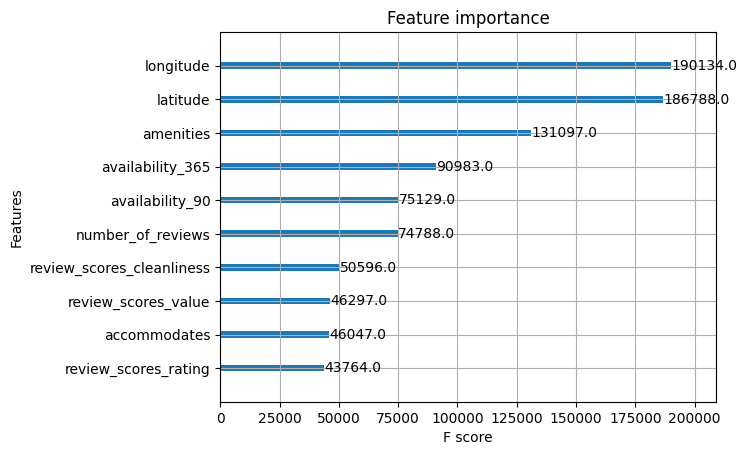

In [ ]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

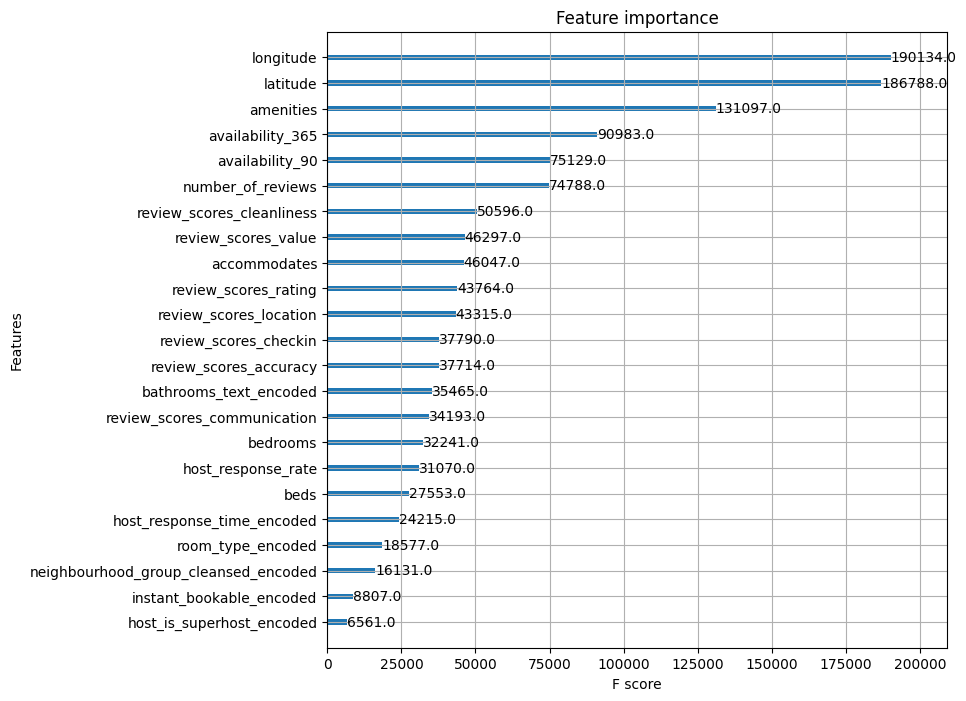

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 8))
plot_importance(model, ax=ax)

LightGBM

In [ ]:
# 기본 LGBMRegressor 모델
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgb = LGBMRegressor(random_state=4)
lgb.fit(x_train, y_train)
pred = lgb.predict(x_test)

print("r2: {0:.5f}".format(r2_score(y_test, pred)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 27125, number of used features: 23
[LightGBM] [Info] Start training from score 216.243834
r2: 0.20440


In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

parameters = {'colsample_bytree':[0.7, 0.8],
              'learning_rate':[0.1, 0.15, 0.2],
              'max_depth':[11],
              'min_child_weight':[4],
              'n_estimators':[1000],
              'subsample':[0.3, 0.4]}

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring='r2',
                        cv=3,
                        n_jobs=-1,
                        verbose=True)
lgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 27125, number of used features: 23
[LightGBM] [Info] Start training from score 216.243834


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.1, 0.15, 0.2], 'max_depth': [11],
                         'min_child_weight': [4], 'n_estimators': [1000],
                         'subsample': [0.3, 0.4]},
             scoring='r2', verbose=True)

In [ ]:
print("GridSearchCV 최적 파라미터:", lgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}


In [ ]:
from sklearn.metrics import r2_score

model = lgb_grid.best_estimator_
pred = model.predict(x_test)

print("r2: {0:.5f}".format(r2_score(y_test, pred)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
r2: 0.20502


GridSearch를 실행한 후 r2 score : 0.20502

bets parameter : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}

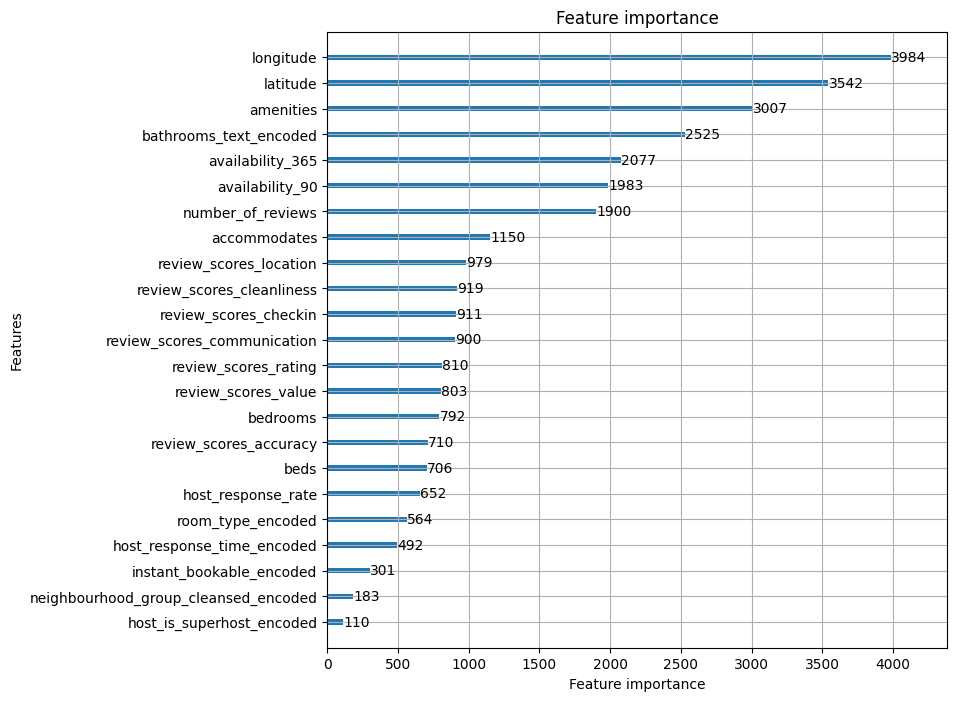

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 8))
plot_importance(model, ax=ax);

스태킹 모델(앙상블)

In [ ]:
model_xgb = xgb_grid.best_estimator_
pred_xgb = model_xgb.predict(x_test)

model_lgb = lgb_grid.best_estimator_
pred_lgb = model_lgb.predict(x_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
from sklearn.metrics import r2_score

pred = 0.5*pred_xgb + 0.5*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.22508


In [ ]:
pred = 0.4*pred_xgb + 0.6*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.22618


In [ ]:
pred = 0.3*pred_xgb + 0.7*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.22473


In [ ]:
pred = 0.2*pred_xgb + 0.8*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.22071


In [ ]:
pred = 0.1*pred_xgb + 0.9*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.21415


0.4 * pred_xgb + 0.6* pred_lgb일 때 r2 score : 0.22618